# Analyse exploratoire, traitements, modélisation des données

## 0 - Chargement des librairies et du dataset

In [117]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal, pointbiserialr, randint, uniform

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score


In [118]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [119]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [120]:
df.shape

(569, 33)

#### 1.1.2 - Observation des types de données

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1.1.3 - Observation des valeurs Null

In [122]:
df_expl = df.drop(columns='Unnamed: 32', axis= 1)

df_expl[df_expl.isna().any(axis= 1)]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]

Il n'y a pas de valeurs null dans le dataset mis à part sur la colonne Unamed : 32 --> 100% null

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

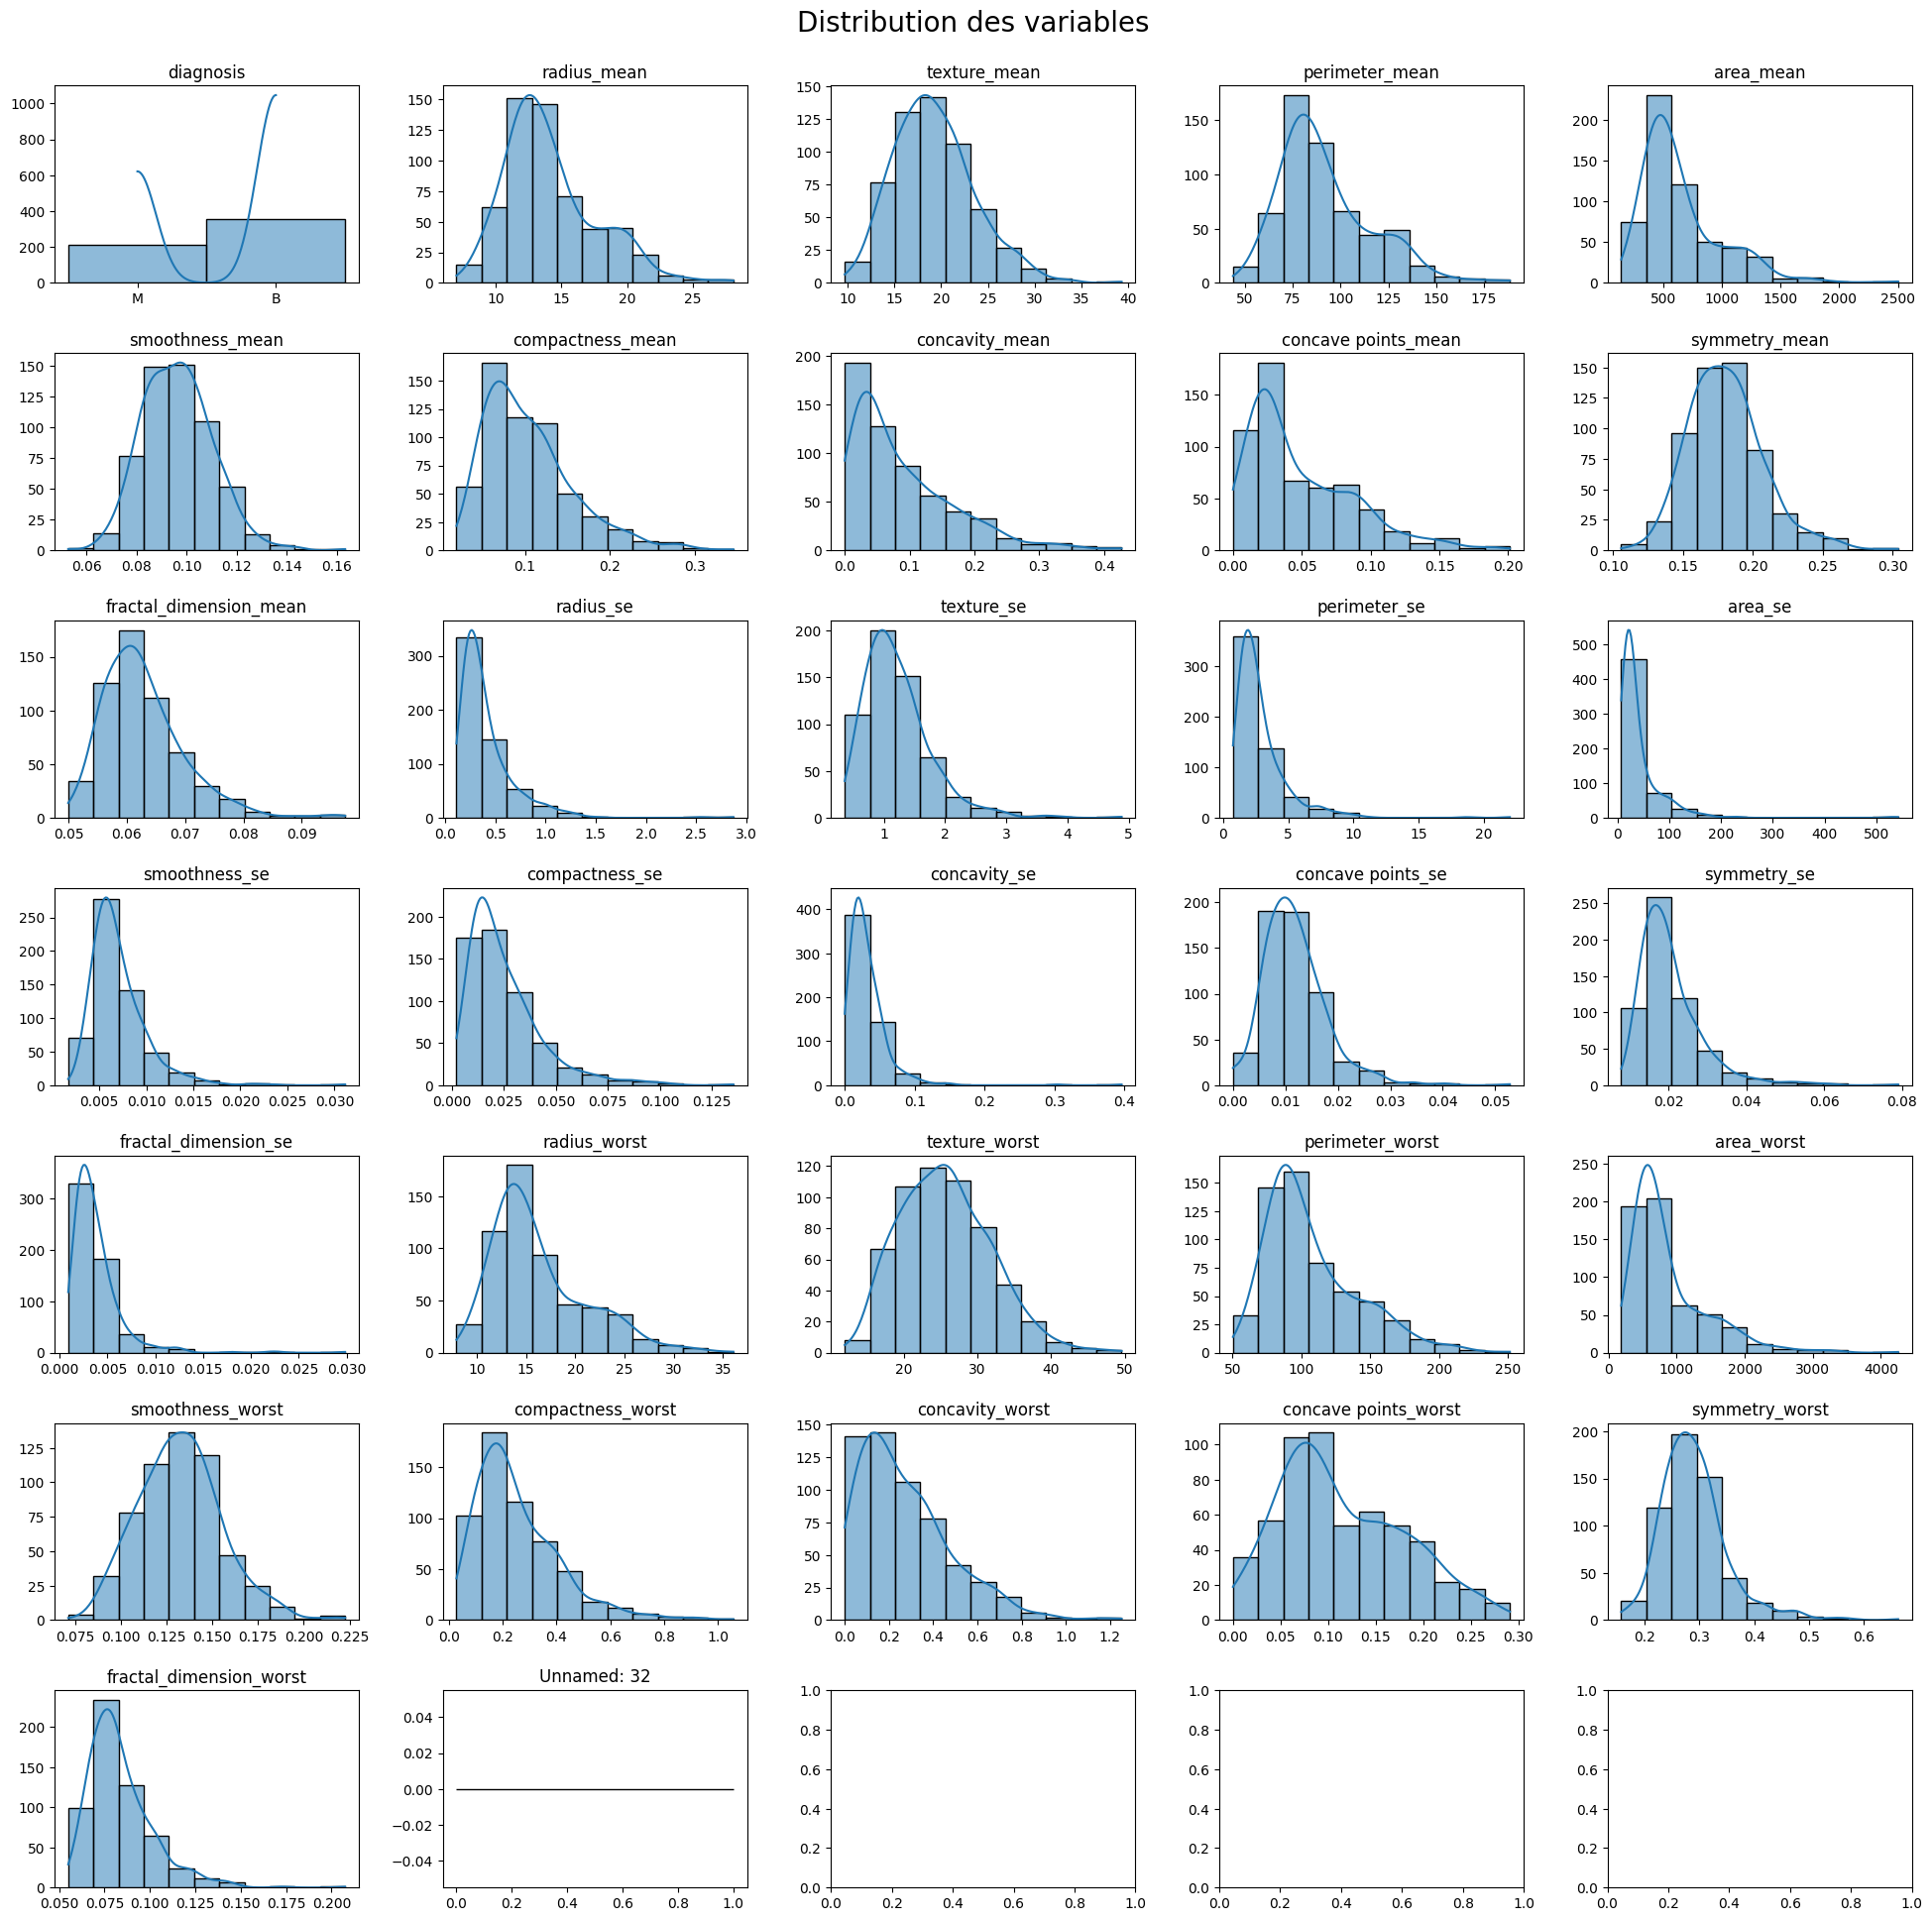

In [123]:
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

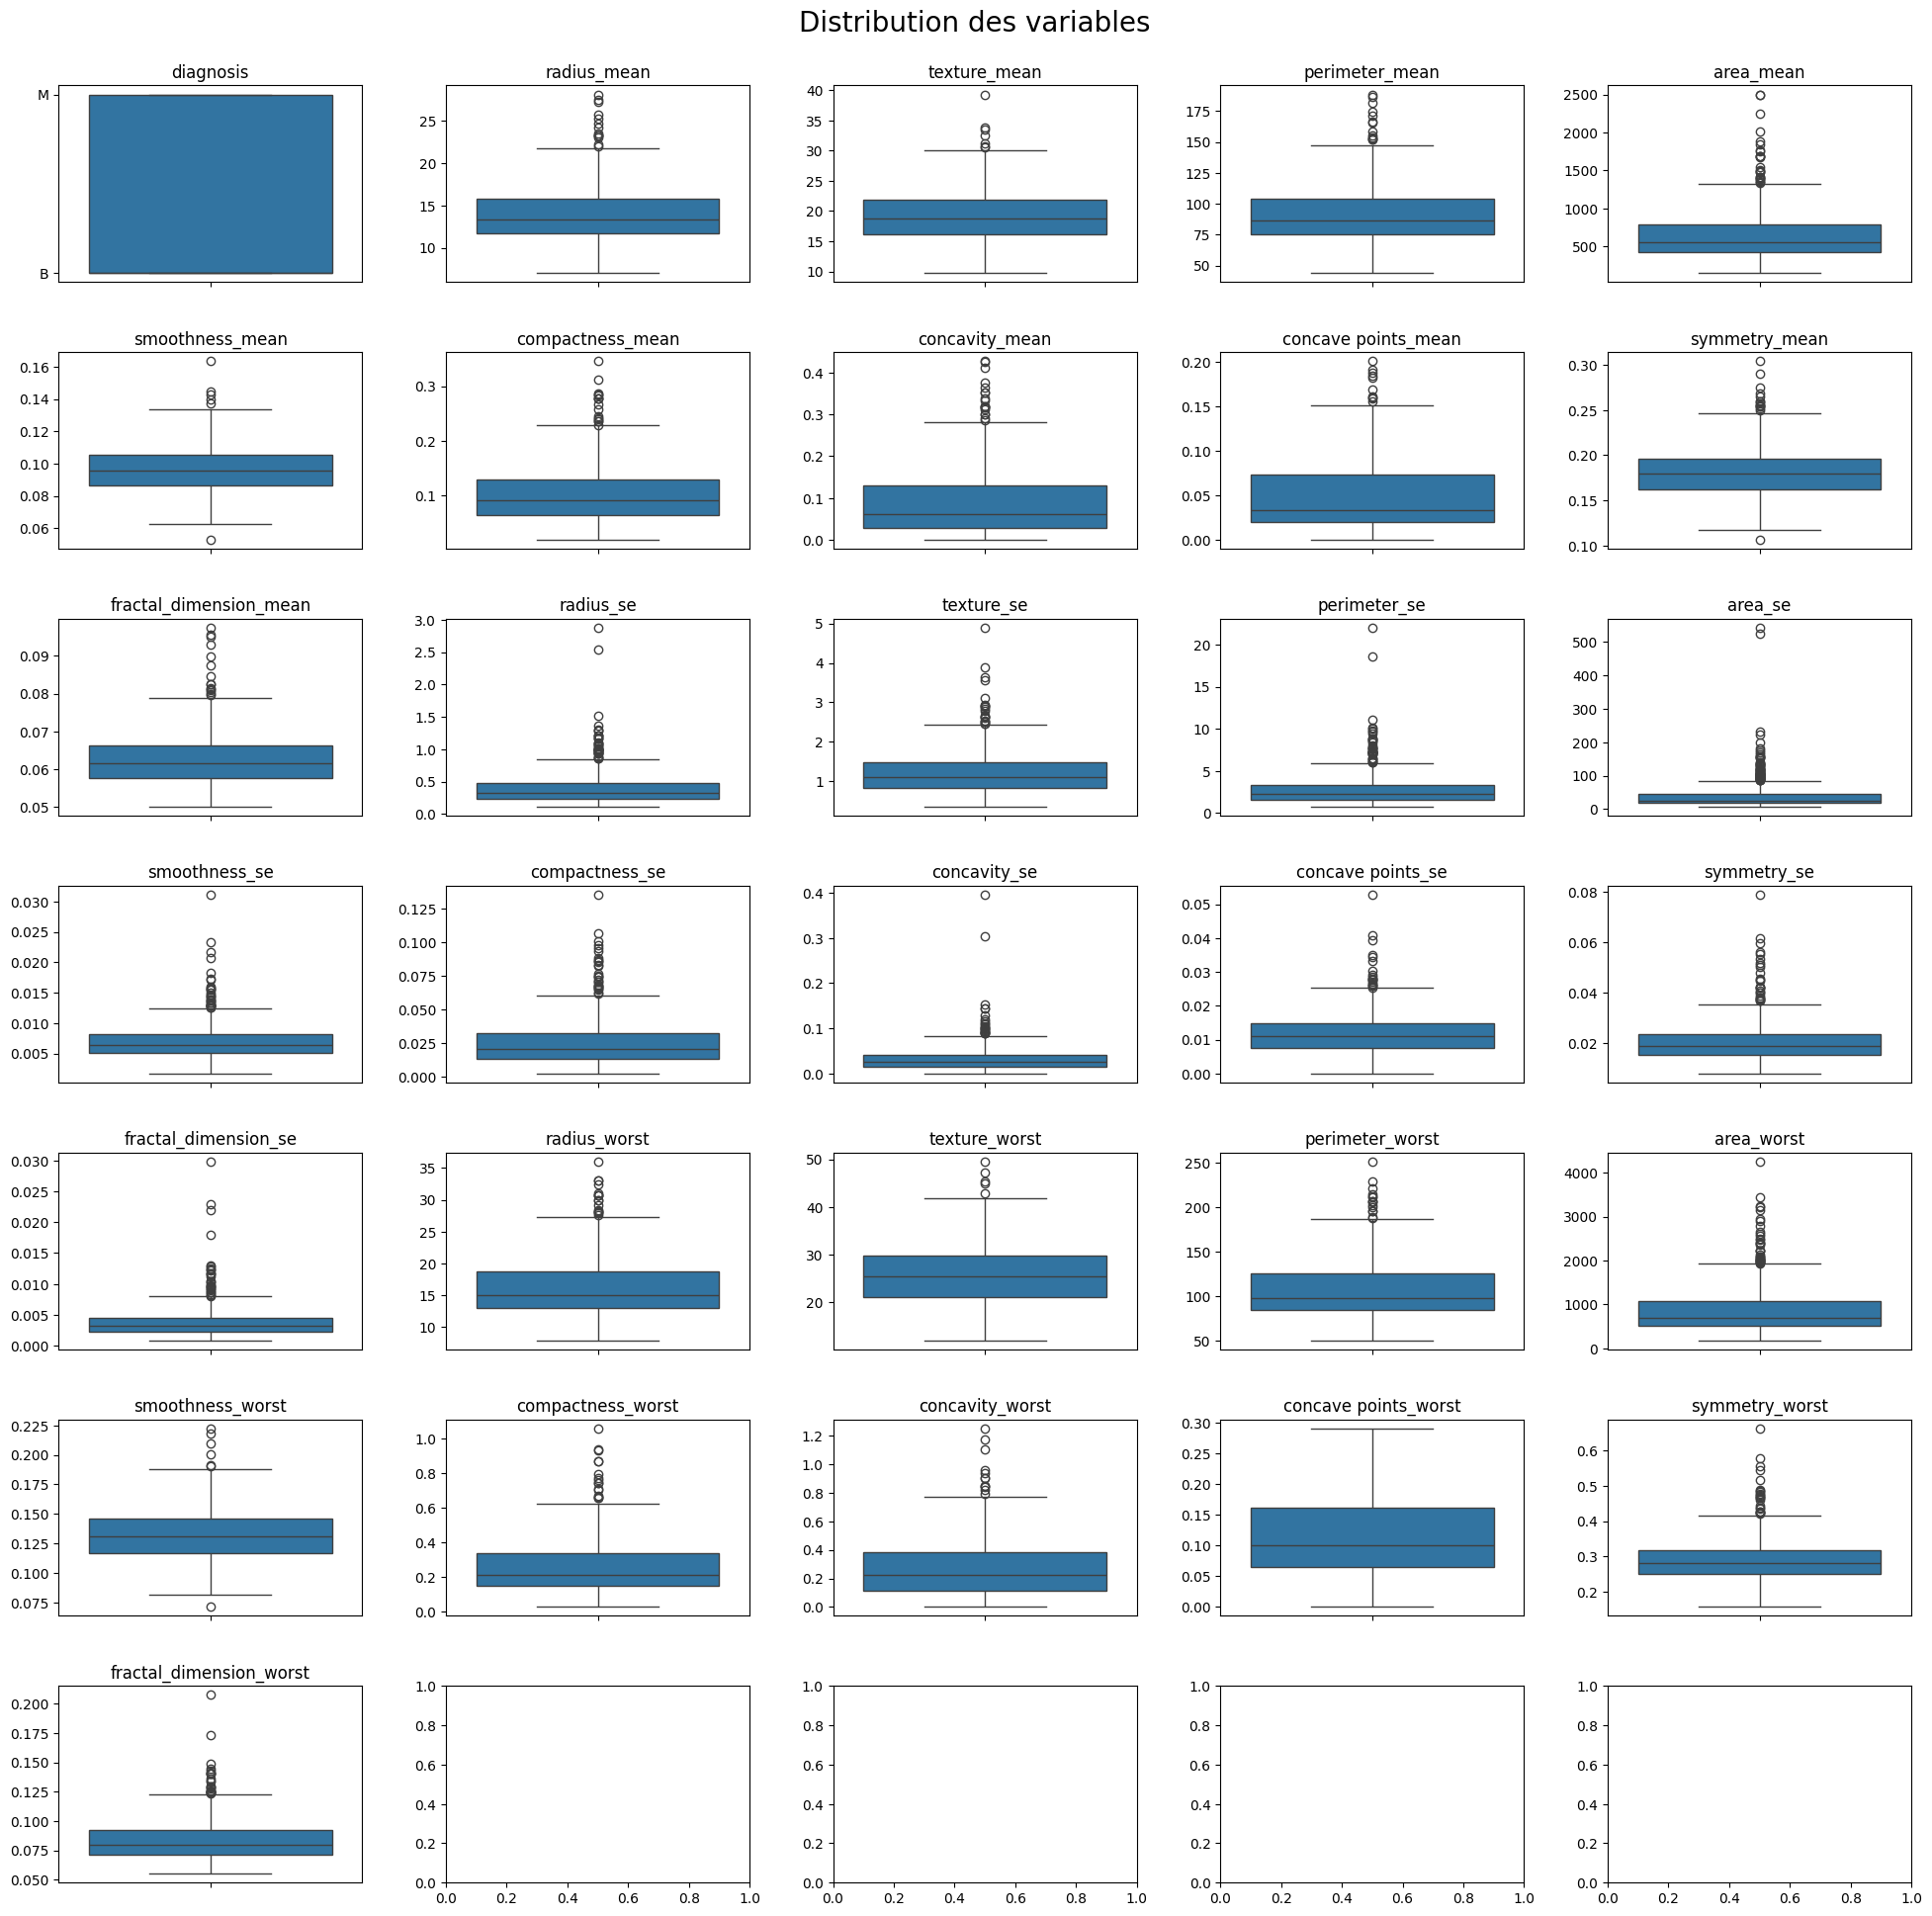

In [124]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_expl.columns[1:]):
    sns.boxplot(df_expl[col],  ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la patie supérieures (et non en dessous de Q1)
#### Commentaire sur les outliers Q1:
Symetry mean : les outliers petit n'ont pas de sens et semble être une valeure abérante
Smoothness mean et worst : l'outliers faible montre une celule très lisse , la valeure semble abérante

#### Commentaires sur les outliers Q3:
L'ensembles des outliers de ce type pourrait correspondre à des carractéristiques de cellules Malines -> avec mon niveau de connaissance, je ne peut pas me prononcer sur le fait que ce soient des valeurs abérantes ou non.

#### 1.2.2 - Analyse statique descriptive de base

In [125]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [126]:
# Observation des valeurs à zéro et des colonnes associés 
# enregistrement dans liste du numero id de chaque ligne contenant au moins un zero

id_avec_des_0 = []

for col in df.columns:
    
    if len(df[df[col] == 0]) != 0:
        df_new = df[df[col] == 0]

        print(f'{col} : {len(df[df[col] == 0])}')

        # ajout de l'index dans une liste
        for ligne in df_new['id']:
            id_avec_des_0.append(ligne)

# set de la liste pour recuupérer les id
id_avec_des_0 = set(id_avec_des_0)

id_avec_des_0

concavity_mean : 13
concave points_mean : 13
concavity_se : 13
concave points_se : 13
concavity_worst : 13
concave points_worst : 13


{92751,
 862722,
 868999,
 871642,
 872113,
 875099,
 894047,
 903483,
 921092,
 923748,
 925236,
 925311,
 9113846}

##### Les valeurs à zéro sur les varaiables suivantes ont-elle un sens ?
concavity_mean  
concave points_mean  
concavity_se  
concave points_se  
concavity_worst  
concave points_worst  

--> vu avec le client : suppression de ces lignes

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [127]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [128]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

#### 1.3.2 - Analyse des  statistique de base

In [129]:
'''
L'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique
'''

"\nL'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique\n"

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [130]:
'''
Aucune valeur manquante ormis sur le uname:32 --> drop de la colonne
'''
df.drop(columns='Unnamed: 32', axis= 1, inplace=True)

### 2.2 - Traitement des doublons

In [131]:
'''
Aucun doublon dans le dataset en se basant sur la colonne d'index
les autres valeurs sont des valeurs continues avec une distrubution qui semble conforme
'''

"\nAucun doublon dans le dataset en se basant sur la colonne d'index\nles autres valeurs sont des valeurs continues avec une distrubution qui semble conforme\n"

### 2.3 - Traitement des valeurs abérantes

Les outliers ne sont pas à éliminé --> vu client

In [132]:
# def remove_outliers_iqr(df):
#     numeric_columns = df.select_dtypes(include=['number']).columns

#     for column in numeric_columns[1:]:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # suppression des outliers Q1 -1.5*IQR
#         df = df[(df[column] >= lower_bound)]
#         # supp des outiliers Q3+1.5
#         # df = df[(df[column] <= upper_bound)]
    
#     return df

In [133]:
# df_cleaned = remove_outliers_iqr(df)

df_cleaned = df

In [134]:
# Suppression des lignes ouù il y a des valeurs à zéro --> Vu avec le client 
id_avec_des_0

df_cleaned = df_cleaned[~df_cleaned['id'].isin(id_avec_des_0)]

## 3 - Visualisation des données nettoyées

In [135]:
# Séparation en 3 dataframe : mean, se, worst
df_cleaned_mal = df_cleaned[df_cleaned.columns[1:2]]

df_cleaned_mean = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[2:12]]], axis = 1)
df_cleaned_se = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[12:22]]], axis = 1)
df_cleaned_worst = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[22:32]]], axis = 1)

### 3.0 - descriptifs des variables

In [136]:
df_cleaned_mean.describe().T[:-1]

count        mean         std         min         25%  \
radius_mean          556.0   14.237565    3.482170    7.691000   11.760000   
texture_mean         556.0   19.259748    4.246993    9.710000   16.177500   
perimeter_mean       556.0   92.736673   24.006362   48.340000   75.845000   
area_mean            556.0  663.734712  350.893313  170.400000  427.750000   
smoothness_mean      556.0    0.096616    0.013895    0.062510    0.086665   
compactness_mean     556.0    0.105679    0.052643    0.019380    0.066608   
concavity_mean       556.0    0.090876    0.079468    0.000692    0.030880   
concave points_mean  556.0    0.050063    0.038517    0.001852    0.020895   
symmetry_mean        556.0    0.181278    0.027446    0.116700    0.161900   

                            50%         75%        max  
radius_mean           13.455000   16.040000    28.1100  
texture_mean          18.855000   21.735000    39.2800  
perimeter_mean        87.090000  105.250000   188.5000  
area_mean            557.650000  798.050000  2501.0000  
smoothness_mean        0.096035    0.105400     0.1634  
compactness_mean       0.095090    0.130600     0.3454  
concavity_mean         0.064905    0.132325     0.4268  
concave points_mean    0.034840    0.074842     0.2012  
symmetry_mean          0.179250    0.195750     0.3040

In [137]:
df_cleaned_se.describe().T[:-1]

count       mean        std       min        25%  \
radius_se          556.0   0.406447   0.279988  0.111500   0.232375   
texture_se         556.0   1.192929   0.499531  0.360200   0.830700   
perimeter_se       556.0   2.879694   2.040962  0.757000   1.605000   
area_se            556.0  40.794973  45.908106  6.802000  17.857500   
smoothness_se      556.0   0.006975   0.002925  0.002667   0.005124   
compactness_se     556.0   0.025842   0.017947  0.002252   0.013688   
concavity_se       556.0   0.032639   0.030136  0.000692   0.015620   
concave points_se  556.0   0.012072   0.005969  0.001852   0.007997   
symmetry_se        556.0   0.020314   0.008072  0.007882   0.015008   

                         50%        75%        max  
radius_se           0.321750   0.482725    2.87300  
texture_se          1.088000   1.465250    3.56800  
perimeter_se        2.295500   3.387500   21.98000  
area_se            24.700000  45.440000  542.20000  
smoothness_se       0.006302   0.008076    0.03113  
compactness_se      0.020740   0.032588    0.13540  
concavity_se        0.026245   0.042563    0.39600  
concave points_se   0.011100   0.014933    0.05279  
symmetry_se         0.018685   0.022932    0.07895

In [138]:
df_cleaned_se.describe().T[:-1]

count       mean        std       min        25%  \
radius_se          556.0   0.406447   0.279988  0.111500   0.232375   
texture_se         556.0   1.192929   0.499531  0.360200   0.830700   
perimeter_se       556.0   2.879694   2.040962  0.757000   1.605000   
area_se            556.0  40.794973  45.908106  6.802000  17.857500   
smoothness_se      556.0   0.006975   0.002925  0.002667   0.005124   
compactness_se     556.0   0.025842   0.017947  0.002252   0.013688   
concavity_se       556.0   0.032639   0.030136  0.000692   0.015620   
concave points_se  556.0   0.012072   0.005969  0.001852   0.007997   
symmetry_se        556.0   0.020314   0.008072  0.007882   0.015008   

                         50%        75%        max  
radius_se           0.321750   0.482725    2.87300  
texture_se          1.088000   1.465250    3.56800  
perimeter_se        2.295500   3.387500   21.98000  
area_se            24.700000  45.440000  542.20000  
smoothness_se       0.006302   0.008076    0.03113  
compactness_se      0.020740   0.032588    0.13540  
concavity_se        0.026245   0.042563    0.39600  
concave points_se   0.011100   0.014933    0.05279  
symmetry_se         0.018685   0.022932    0.07895

In [139]:
df_cleaned_worst.describe().T

count        mean         std         min  \
radius_worst             556.0   16.407687    4.797695    8.678000   
texture_worst            556.0   25.679388    6.105744   12.020000   
perimeter_worst          556.0  108.242878   33.337041   54.490000   
area_worst               556.0  893.412410  569.492912  223.600000   
smoothness_worst         556.0    0.132824    0.022616    0.081250   
compactness_worst        556.0    0.258472    0.156663    0.034320   
concavity_worst          556.0    0.278553    0.206803    0.001845   
concave points_worst     556.0    0.117286    0.064087    0.008772   
symmetry_worst           556.0    0.290802    0.062027    0.156500   
fractal_dimension_worst  556.0    0.084141    0.018130    0.055040   

                                25%         50%          75%        max  
radius_worst              13.085000   15.040000    19.097500    36.0400  
texture_worst             21.160000   25.445000    29.547500    49.5400  
perimeter_worst           84.567500   98.320000   126.750000   251.2000  
area_worst               521.450000  696.050000  1106.750000  4254.0000  
smoothness_worst           0.117175    0.131550     0.146325     0.2226  
compactness_worst          0.151175    0.217000     0.341600     1.0580  
concavity_worst            0.121800    0.231400     0.386200     1.2520  
concave points_worst       0.065713    0.101700     0.163150     0.2910  
symmetry_worst             0.250900    0.282450     0.318850     0.6638  
fractal_dimension_worst    0.071873    0.080075     0.092095     0.2075

### 3.1 - Observation des distributions Univariées

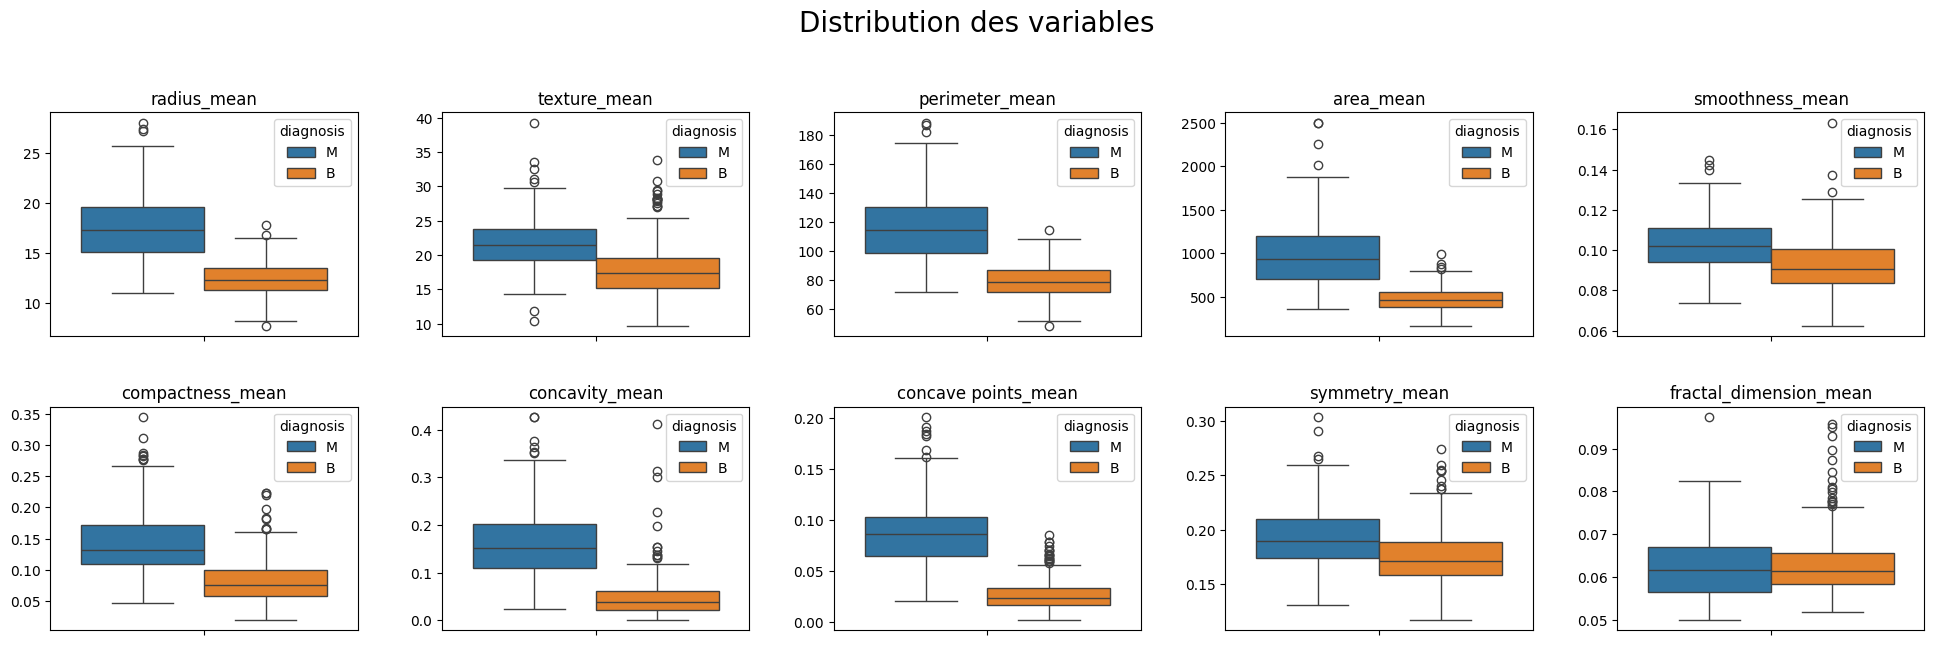

In [140]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.boxplot(data=df_cleaned_mean, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

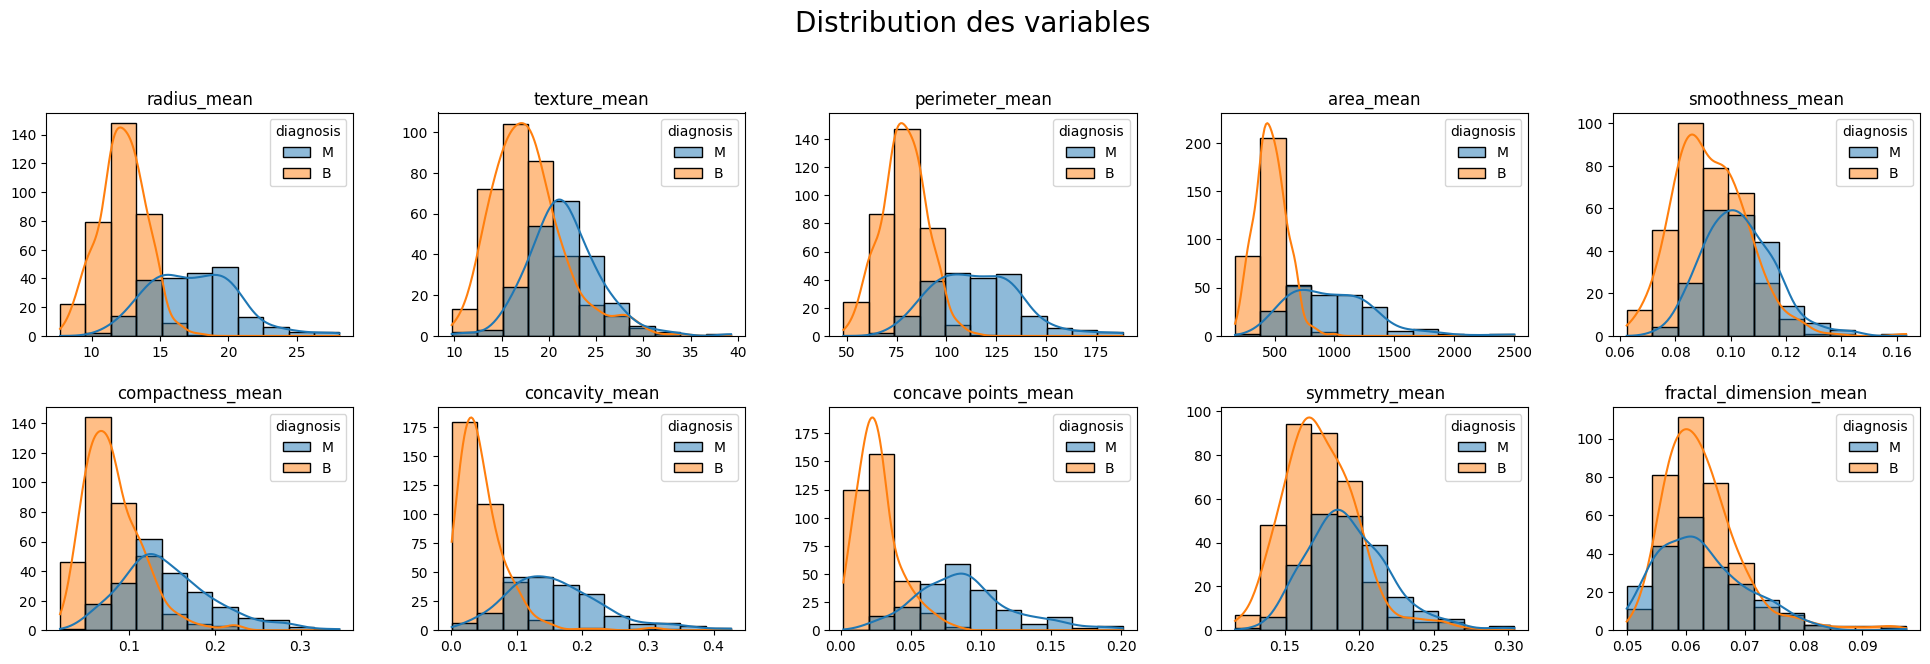

In [141]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.histplot(df_cleaned_mean, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

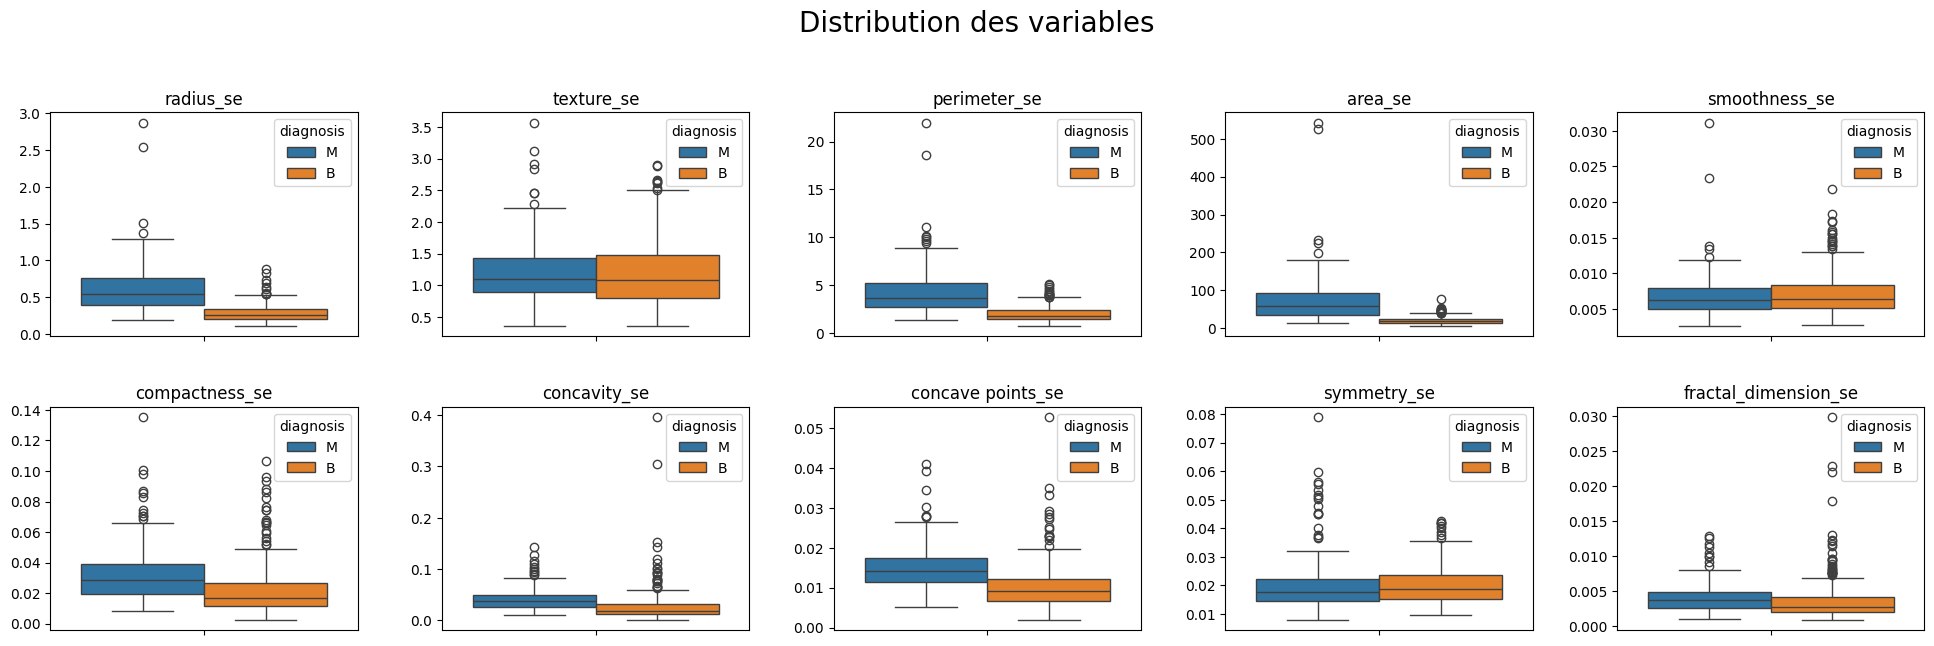

In [142]:
'''
Observation des data se
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.boxplot(data=df_cleaned_se, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

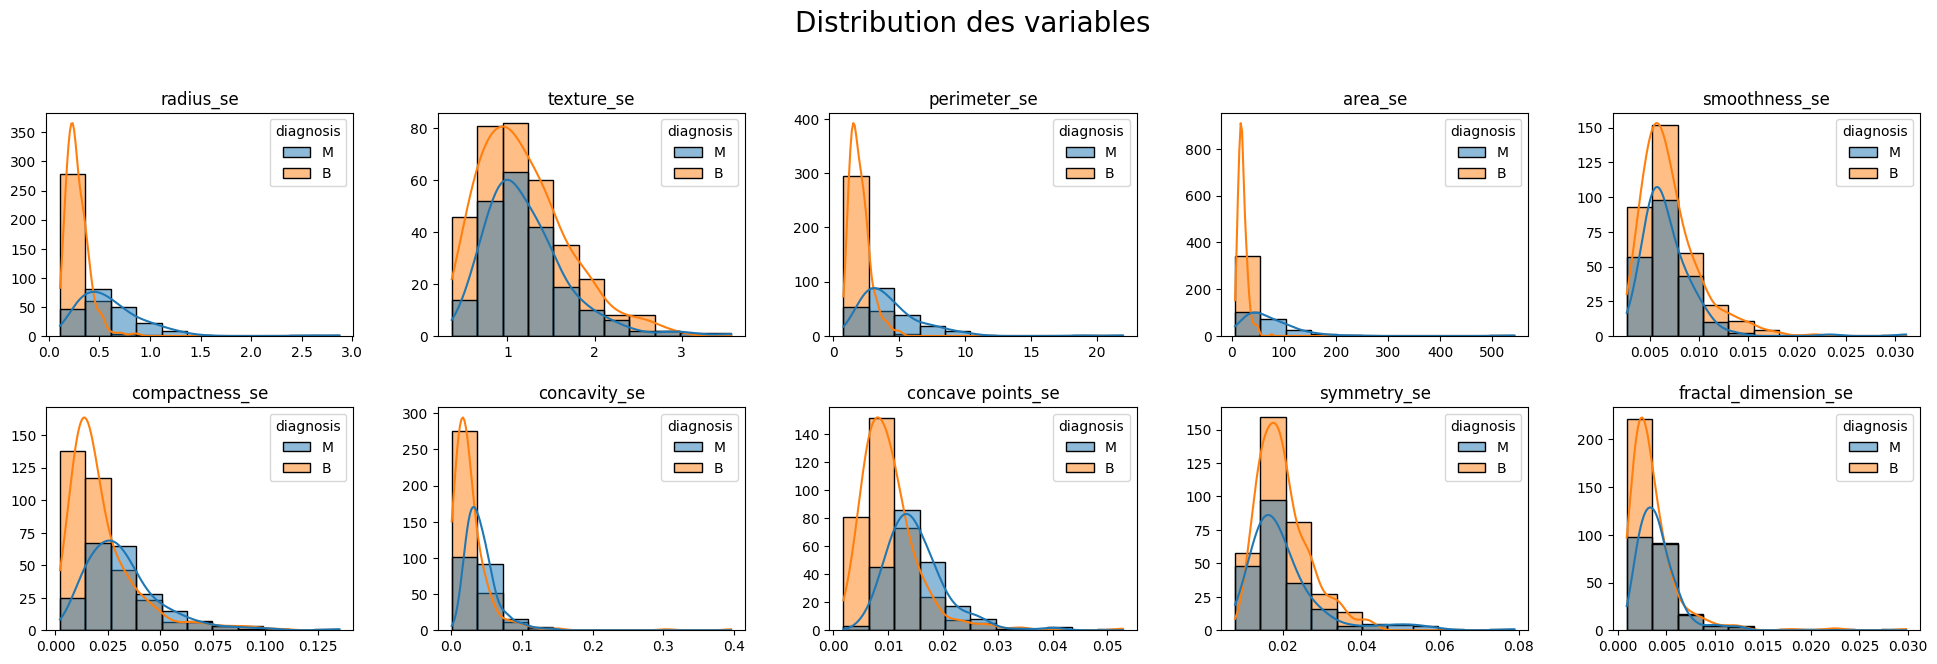

In [143]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.histplot(df_cleaned_se, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

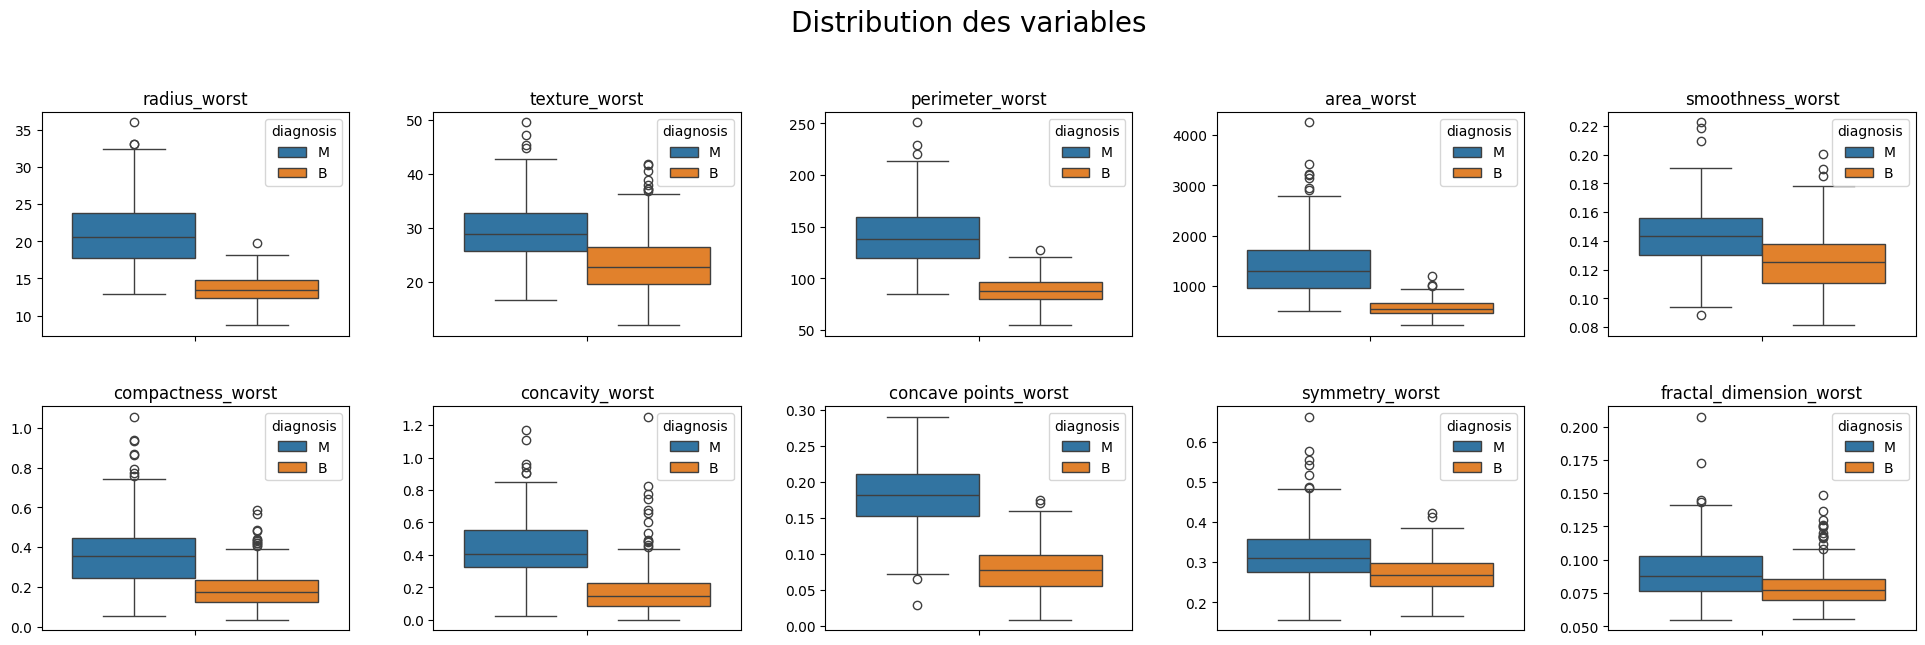

In [144]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.boxplot(data=df_cleaned_worst, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

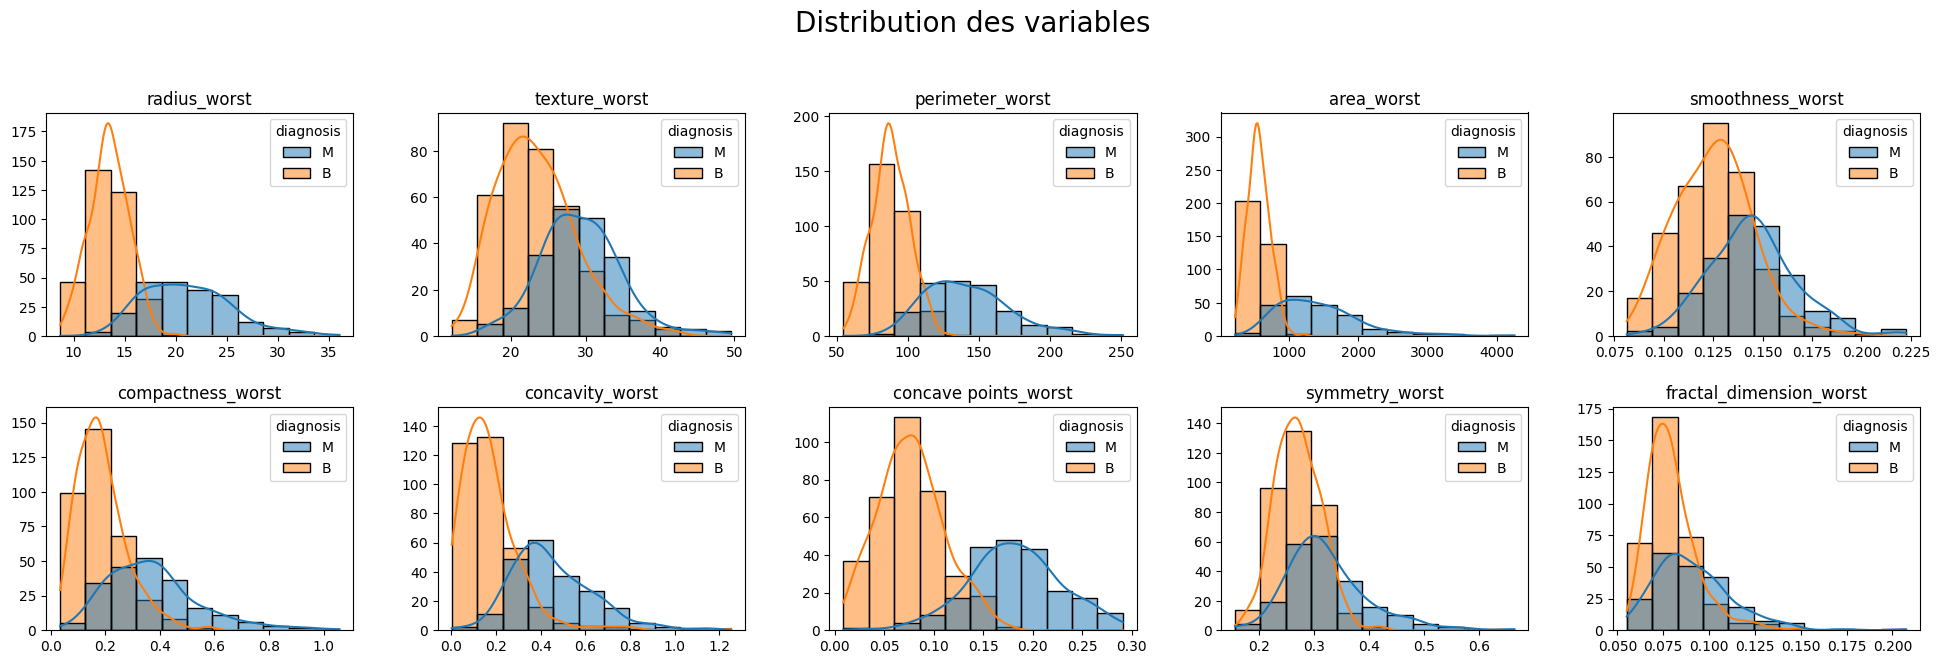

In [145]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.histplot(df_cleaned_worst, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

### 3.2 - Observation des correlations

#### 3.2.1 - Correlations des variables numériques continues

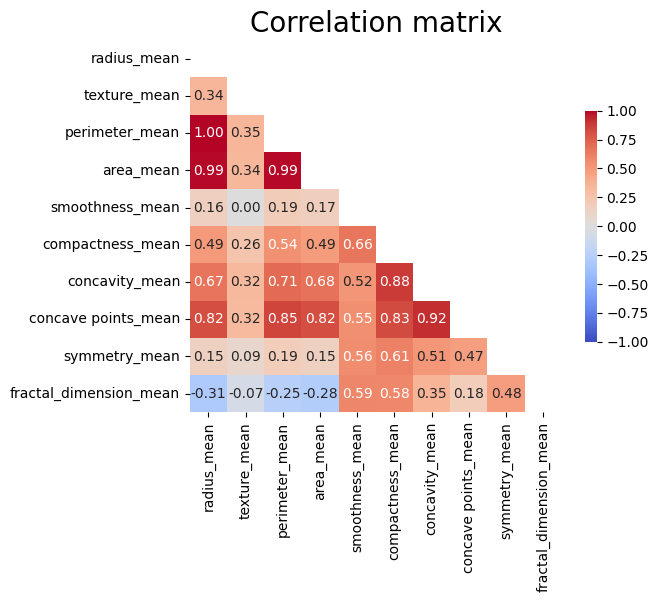

In [146]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_mean.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_mean[list_columns_corr].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

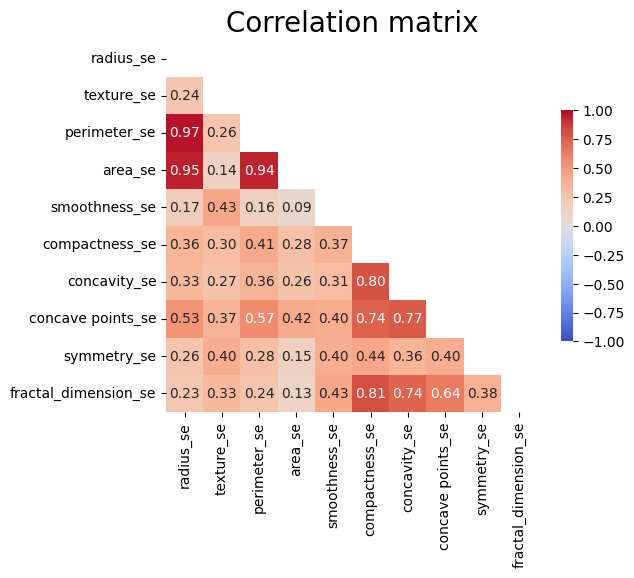

In [147]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_se.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_se[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

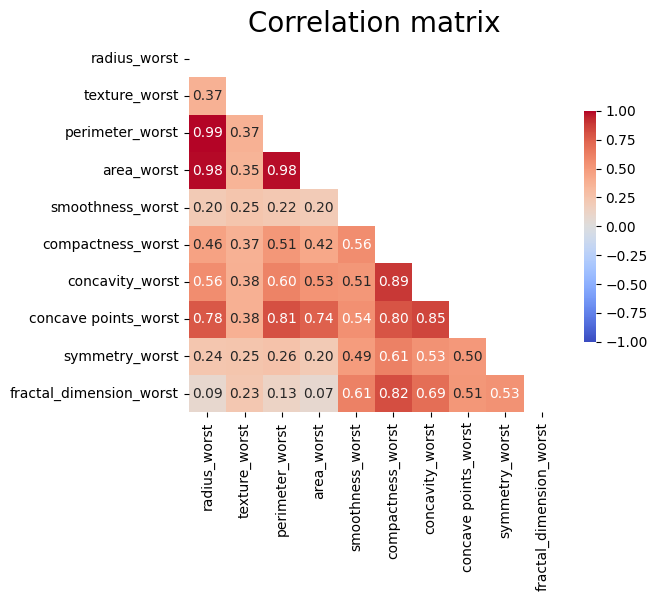

In [148]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_worst.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_worst[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

#### 3.2.1.1 Etude de la multicolinéarité

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Ajout d'une constante pour le calcul du VIF
df_cleaned_mean2 = add_constant(df_cleaned_mean.drop(columns=['diagnosis', 'radius_mean', 'perimeter_mean', 'concave points_mean', 'compactness_mean']))

# X_vif = add_constant(df.drop(["target", "fbs"], axis=1))

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = df_cleaned_mean2.columns
vif_data["VIF"] = [variance_inflation_factor(df_cleaned_mean2.values, i) for i in range(df_cleaned_mean2.shape[1])]

print(vif_data)


                  feature         VIF
0                   const  303.893513
1            texture_mean    1.183384
2               area_mean    4.418943
3         smoothness_mean    2.080162
4          concavity_mean    4.979361
5           symmetry_mean    1.688585
6  fractal_dimension_mean    3.364008


In [150]:
df_cleaned_mean = df_cleaned_mean.drop(columns=['radius_mean', 'perimeter_mean', 'concave points_mean', 'compactness_mean'])

In [151]:
# Ajout d'une constante pour le calcul du VIF
df_cleaned_se2 = add_constant(df_cleaned_se.drop(columns=['diagnosis', 'radius_se', 'perimeter_se', 'compactness_se']))

# X_vif = add_constant(df.drop(["target", "fbs"], axis=1))

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = df_cleaned_se2.columns
vif_data["VIF"] = [variance_inflation_factor(df_cleaned_se2.values, i) for i in range(df_cleaned_se2.shape[1])]

print(vif_data)


                feature        VIF
0                 const  11.788519
1            texture_se   1.372027
2               area_se   1.263434
3         smoothness_se   1.483685
4          concavity_se   3.358861
5     concave points_se   3.150784
6           symmetry_se   1.376363
7  fractal_dimension_se   2.557926


In [152]:
df_cleaned_se = df_cleaned_se.drop(columns=['radius_se', 'perimeter_se', 'compactness_se'])

In [153]:
# Ajout d'une constante pour le calcul du VIF
df_cleaned_worst2 = add_constant(df_cleaned_worst.drop(columns=['diagnosis', 'radius_worst', 'perimeter_worst', 'compactness_worst']))

# X_vif = add_constant(df.drop(["target", "fbs"], axis=1))

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = df_cleaned_worst2.columns
vif_data["VIF"] = [variance_inflation_factor(df_cleaned_worst2.values, i) for i in range(df_cleaned_worst2.shape[1])]

print(vif_data)

                   feature        VIF
0                    const  80.836698
1            texture_worst   1.234838
2               area_worst   3.378564
3         smoothness_worst   1.974526
4          concavity_worst   5.567378
5     concave points_worst   7.713624
6           symmetry_worst   1.620723
7  fractal_dimension_worst   3.099393


In [154]:
df_cleaned_worst = df_cleaned_worst.drop(columns=[ 'radius_worst', 'perimeter_worst', 'compactness_worst'])

####  3.2.2 - Correlations des variables numériques et de la variable de classification

In [155]:
# encodage 0 ou 1 pour la class 'diagnosis'
label_encoder = LabelEncoder()

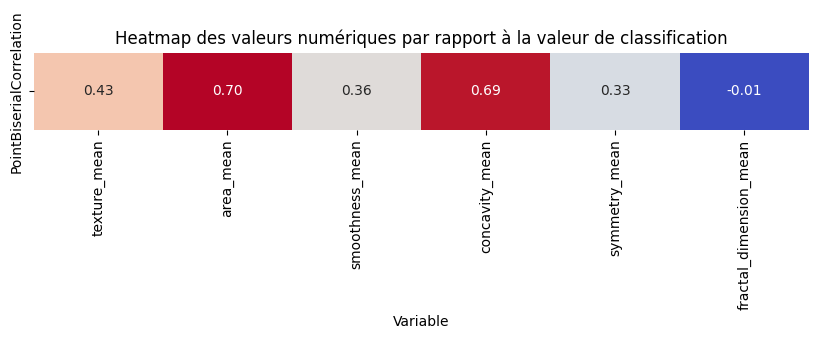

In [156]:
df_cleaned_mean['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_mean['diagnosis'])

continuous_cols = df_cleaned_mean.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_mean['diagnosis_encoded'], df_cleaned_mean[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

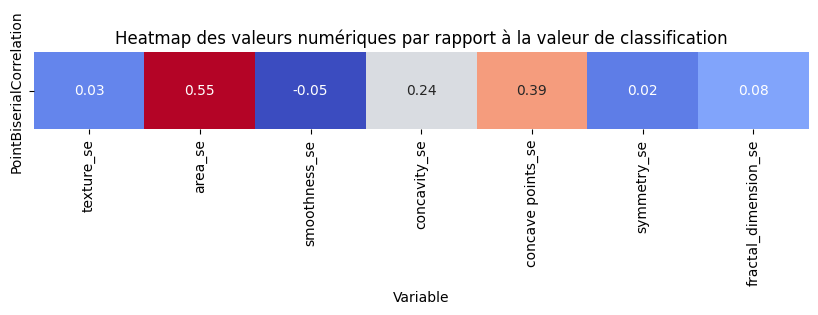

In [157]:
# encodage 0 ou 1 pour la class 'diagnosis'
df_cleaned_se['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_se['diagnosis'])

continuous_cols = df_cleaned_se.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_se['diagnosis_encoded'], df_cleaned_se[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

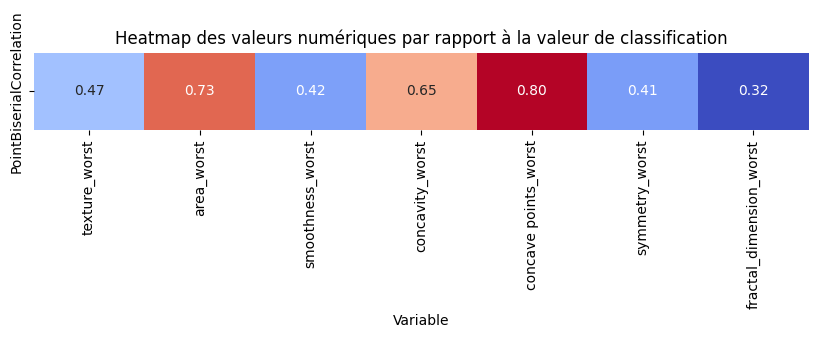

In [158]:
# encodage 0 ou 1 pour la class 'diagnosis'

df_cleaned_worst['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_worst['diagnosis'])

continuous_cols = df_cleaned_worst.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_worst['diagnosis_encoded'], df_cleaned_worst[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

## 4 - Validation statistique pour l'interpretabilité des résultats

### 4.1 - Separation des variables en df_B et df_M

In [159]:
df_B_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "B"]
df_M_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "M"]

df_B_se = df_cleaned_se[df_cleaned_se['diagnosis']== "B"]
df_M_se = df_cleaned_se[df_cleaned_se['diagnosis']== "M"]

df_B_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "B"]
df_M_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "M"]

### 4.2 - Test sur les variables

<b>Sélection du Test</b>  

<u>Données normales et variances égales :</u> Utilisez le test t de Student.  

<u>Données normales et variances inégales :</u>  Utilisez le test t de Welch.  

<u>Données non normales :</u>  Utilisez le test de Mann-Whitney U ou Kruskal-Wallis (extension non paramétrique du test de Mann-Whitney U) ou le test de Kolmogorov-Smirnov.  

<u>Données catégorielles :</u>  Utilisez le test de chi-carré ou le test de Fisher.  

Test t de Student :

Objectif : Comparer les moyennes de deux échantillons indépendants.
Conditions : Les données doivent être normalement distribuées et les variances des deux échantillons doivent être égales (homoscédasticité).
Variante : Test t de Welch, utilisé lorsque les variances ne sont pas égales.

NB :  
Test de chi-carré :

Objectif : Comparer les distributions de deux variables catégorielles (si la variable est discrète).  
Conditions : Les données doivent être sous forme de comptage dans des catégories.
  
  
Test de Fisher :

Objectif : Comparer les proportions dans des tableaux de contingence pour des petits échantillons.  
Conditions : Utilisé lorsque les effectifs des catégories sont petits.

Test de Mann-Whitney U (ou test de Wilcoxon pour échantillons indépendants) :

Objectif : Comparer les distributions de deux échantillons indépendants.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  
  
  
Test de Kolmogorov-Smirnov :

Objectif : Comparer les distributions cumulatives de deux échantillons.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  

#### 4.2.1 - Test sur les variables catégorielles

In [160]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

#### 4.2.2 - Variable continue

##### 4.2.2.1 - Test de kruskal-wallis

Interprétation des résultats  
Statistique H : Valeur de la statistique de Kruskal-Wallis.  
p-value : Si la p-value est inférieure à un seuil alpha (par exemple 0.05), vous rejetez l'hypothèse nulle selon laquelle les distributions des échantillons sont identiques.

In [161]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size = min(len(df_M_mean), len(df_B_mean))

# # Réduire chaque DataFrame à la taille minimale
# df_M_mean = df_M_mean.sample(n=min_size, random_state=42)
# df_B_mean = df_B_mean.sample(n=min_size, random_state=42)

In [162]:
# preparation dictionnaire pour stock des H

dict_H = {'mean' : [], 'se' : [], 'worst' : []}
category = []

In [163]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_mean)}')
print(f'B : {len(df_B_mean)}\n')


print(f'\nResultat des tests sur les différentes variables\n')

for var_mean in df_M_mean.columns[1:-1]:
    stat, p = kruskal(df_M_mean[var_mean], df_B_mean[var_mean])

    dict_H['mean'].append(stat)
    category.append(var_mean)

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_mean}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : texture_mean
 H= 126.344
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_mean
 H= 298.801
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_mean
 H= 75.565
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_mean
 H= 297.956
 p= 0.00000

---------------------------------

Résultat sur la variable mean : symmetry_mean
 H= 63.243
 p= 0.00000

---------------------------------

Résultat sur la variable mean : fractal_dimension_mean
 H= 0.253
 p= 0.61514

L'hypothèse selon laquelle les distributions des échantillons de fractal_dimension_mean sont différentes est refusé.



In [164]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_se = min(len(df_M_se), len(df_B_se))

# # Réduire chaque DataFrame à la taille minimale
# df_M_se = df_M_se.sample(n=min_size_se, random_state=42)
# df_B_se = df_B_se.sample(n=min_size_se, random_state=42)

In [165]:
# parcours des variables pour le test sur se

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset se')
print(f'M : {len(df_M_se)}')
print(f'B : {len(df_B_se)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_se in df_M_se.columns[1:-1]:
    stat, p = kruskal(df_M_se[var_se], df_B_se[var_se])

    dict_H['se'].append(stat)
    category.append(var_se)

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_se}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des \néchantillons de {var_se} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_se} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset se
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : texture_se
 H= 0.770
 p= 0.38035

L'hypothèse selon laquelle les distributions des 
échantillons de texture_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : area_se
 H= 285.352
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_se
 H= 0.772
 p= 0.37962

L'hypothèse selon laquelle les distributions des 
échantillons de smoothness_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : concavity_se
 H= 116.699
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_se
 H= 126.656
 p= 0.00000

---------------------------------

Résultat sur la variable mean : symmetry_se
 H= 3.094
 p= 0.07861

L'hypothèse selon laquelle les distributio

In [166]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_worst = min(len(df_M_worst), len(df_B_worst))

# # Réduire chaque DataFrame à la taille minimale
# df_M_worst = df_M_worst.sample(n=min_size_worst, random_state=42)
# df_B_worst = df_B_worst.sample(n=min_size_worst, random_state=42)

In [167]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_worst)}')
print(f'B : {len(df_B_worst)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_worst in df_M_worst.columns[1:-1]:
    stat, p = kruskal(df_M_worst[var_worst], df_B_worst[var_worst])

    dict_H['worst'].append(stat)
    category.append(var_worst)

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_worst}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des \néchantillons de {var_worst} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_worst} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : texture_worst
 H= 131.553
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_worst
 H= 345.196
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_worst
 H= 98.970
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_worst
 H= 275.035
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_worst
 H= 340.376
 p= 0.00000

---------------------------------

Résultat sur la variable mean : symmetry_worst
 H= 87.218
 p= 0.00000

---------------------------------

Résultat sur la variable mean : fractal_dimension_worst
 H= 53.195
 p= 0.00000



In [168]:
# '''
# Visualisation des H sur les differentes variables en fonction des mean, se et worst 
# '''

# df = pd.DataFrame(dict_H)

# # Ajouter une colonne pour les catégories
# df['category'] = pd.Series(category)

# # Créer le barplot
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df.melt(id_vars='category', var_name='metric', value_name='value'), x='category', y='value', hue='metric')

# # Ajouter des labels et un titre
# plt.xlabel('Category')
# plt.xticks(rotation= 45)
# plt.ylabel('Value')
# plt.title('Barplot des valeurs mean, se et worst par catégorie')

# # Afficher le plot
# plt.show()


#### 4.2.3 - Variables discretes

In [169]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

## 5 - Préparation des données - prétraitement

### 5.1 - Preparation des pipeline de transformations

#### 5.1.1 - Fusion des df

In [170]:
df_mean = pd.concat([df_B_mean, df_M_mean], axis= 0)
df_se = pd.concat([df_B_se, df_M_se], axis= 0)
df_worst = pd.concat([df_B_worst, df_M_worst], axis= 0)


In [171]:
df_se = df_se.rename(columns={'diagnosis':'diag_se'})
df_worst = df_worst.rename(columns={'diagnosis':'diag_worst'})

In [172]:
df = pd.concat([df_mean, df_se, df_worst], axis= 1 ).drop(columns=['diag_se', 'diag_worst'])


#### 5.1.2 - Préparation du pipline

In [173]:
'''
colonne à ecarter:

fractal_dimension_mean
texture_se
smoothness_se
symmetry_se

'''

df = df.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'diagnosis_encoded'], axis=1)

# df = df.drop(['diagnosis_encoded'], axis=1)

In [174]:
# definition des colonnes des df à prendre en consideration et les classer par transformation

class_feature = ['diagnosis']

features_std = list(df.columns)

print(features_std)
features_std.remove('diagnosis')

# features_log = []

# features_log_and_std = []


['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [175]:
# Préparation des transformateurs pour les caractéristiques numériques
numeric_transformer_std = (Pipeline( steps= [
    ('stdScaller', StandardScaler()),
    # ('pca', PCA(n_coponents=2))
]))

# numeric_transformer_log = (Pipeline( steps= [
#     ('log_Scaler', FunctionTransformer(np.log1p)),
#     # ('pca', PCA(n_coponents=2))
# ]))

# numeric_transformer_log_std = (Pipeline( steps= [
#     ('log_Scaler', FunctionTransformer(np.log1p)),
#     ('std_caler', StandardScaler()) 
# ]))

        

# Combinaison des transformation pour le preprocessing
preprocessor = ColumnTransformer(
    transformers= [
        ('num_std', numeric_transformer_std, features_std),
        # ('num_log', numeric_transformer_log, features_log),
        # ('num_log_std', numeric_transformer_log_std, features_log_and_std)
    ]
)

## 6 - Definition et essai des models

### 6.0 - Definition des X et y

In [176]:
# # uniformisation des quantité de données entre malade et sain

# # Trouver la taille minimale
# min_size = min(len(df[df['diagnosis'] == "M"]), len(df[df['diagnosis'] == "B"]))

# # Réduire chaque DataFrame à la taille minimale
# df_M = df[df['diagnosis'] == "M"].sample(n=min_size, random_state=42)
# df_B = df[df['diagnosis'] == "B"].sample(n=min_size, random_state=42)

# df = pd.concat([df_M, df_B], axis = 0)

In [177]:
y = df['diagnosis'] 

X = df[features_std]  

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

### 6.1 - Logistic Regression

#### 6.1.0 - Definition du modele et du pipeline

In [179]:
RL_model = LogisticRegression()

In [180]:
pipeline_reg_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_regression_logistic', RL_model)
])

#### 6.1.1 - Définition des hyperparametres et du randomsearchCV

In [181]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_reg_log = {
    'model_regression_logistic__penalty': ['l1', 'l2'], 
    'model_regression_logistic__C': uniform(0.01, 10),                         
    'model_regression_logistic__solver': ['liblinear','saga'],  
    'model_regression_logistic__max_iter': randint(100, 1000)                            
}

In [182]:
# Configurer la recherche aléatoire
random_search_reg_log = RandomizedSearchCV(
    estimator=pipeline_reg_log,
    param_distributions=param_dist_reg_log,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # scoring= make_scorer(recall_score, pos_label = 'B')    
    # error_score='raise'
)

#### 6.1.2 - Entrainement et prediction du modele

In [183]:
random_search_reg_log.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['texture_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'concavity_mean',
                                                                                'symmetry_mean',
                                                                                'area_se',
                                                                                'concavity_se',
                                                                                'concave '
                                                                                'points_se',
                                                                                'fractal_dimension_se',
                                                                                'texture_worst',
                                                                                'area_worst',
                                                                                'smoothness_wo...
                   param_distributions={'model_regression_logistic__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000279FA6A1760>,
                                        'model_regression_logistic__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002798563AF30>,
                                        'model_regression_logistic__penalty': ['l1',
                                                                               'l2'],
                                        'model_regression_logistic__solver': ['liblinear',
                                                                              'saga']},
                   random_state=42, verbose=2)

In [184]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_reg_log.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_reg_log = random_search_reg_log.best_estimator_
test_score_reg_log = best_model_reg_log.score(X_test, y_test)

Best parameters found:  {'model_regression_logistic__C': 9.395527090157502, 'model_regression_logistic__max_iter': 485, 'model_regression_logistic__penalty': 'l2', 'model_regression_logistic__solver': 'saga'}


In [185]:
y_pred_rl = best_model_reg_log.predict(X_test)

#### 6.1.3 - Mesure de l'efficacité du modele

In [186]:
accuracy_rl = accuracy_score(y_test, y_pred_rl)

print(f'Accuracy: {accuracy_rl:.4f}')

Accuracy: 0.9856


In [187]:
class_report_rl = classification_report(y_test, y_pred_rl)

print(class_report_rl)

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        86
           M       0.98      0.98      0.98        53

    accuracy                           0.99       139
   macro avg       0.98      0.98      0.98       139
weighted avg       0.99      0.99      0.99       139



In [188]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_reg_log, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.97321429 0.97297297 0.98198198 0.97297297 0.99099099]
Score moyen :  0.9784266409266408
Écart-type des scores :  0.007171568555299761


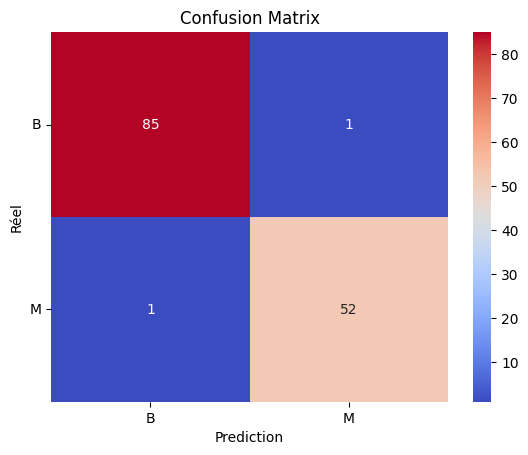

In [189]:
conf_matrix_rl = confusion_matrix(y_test, y_pred_rl)

sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.xticks([0.5, 1.5], ['B', 'M'])
plt.yticks([0.5, 1.5], ['B', 'M'], rotation=0)
plt.title('Confusion Matrix')
plt.show()

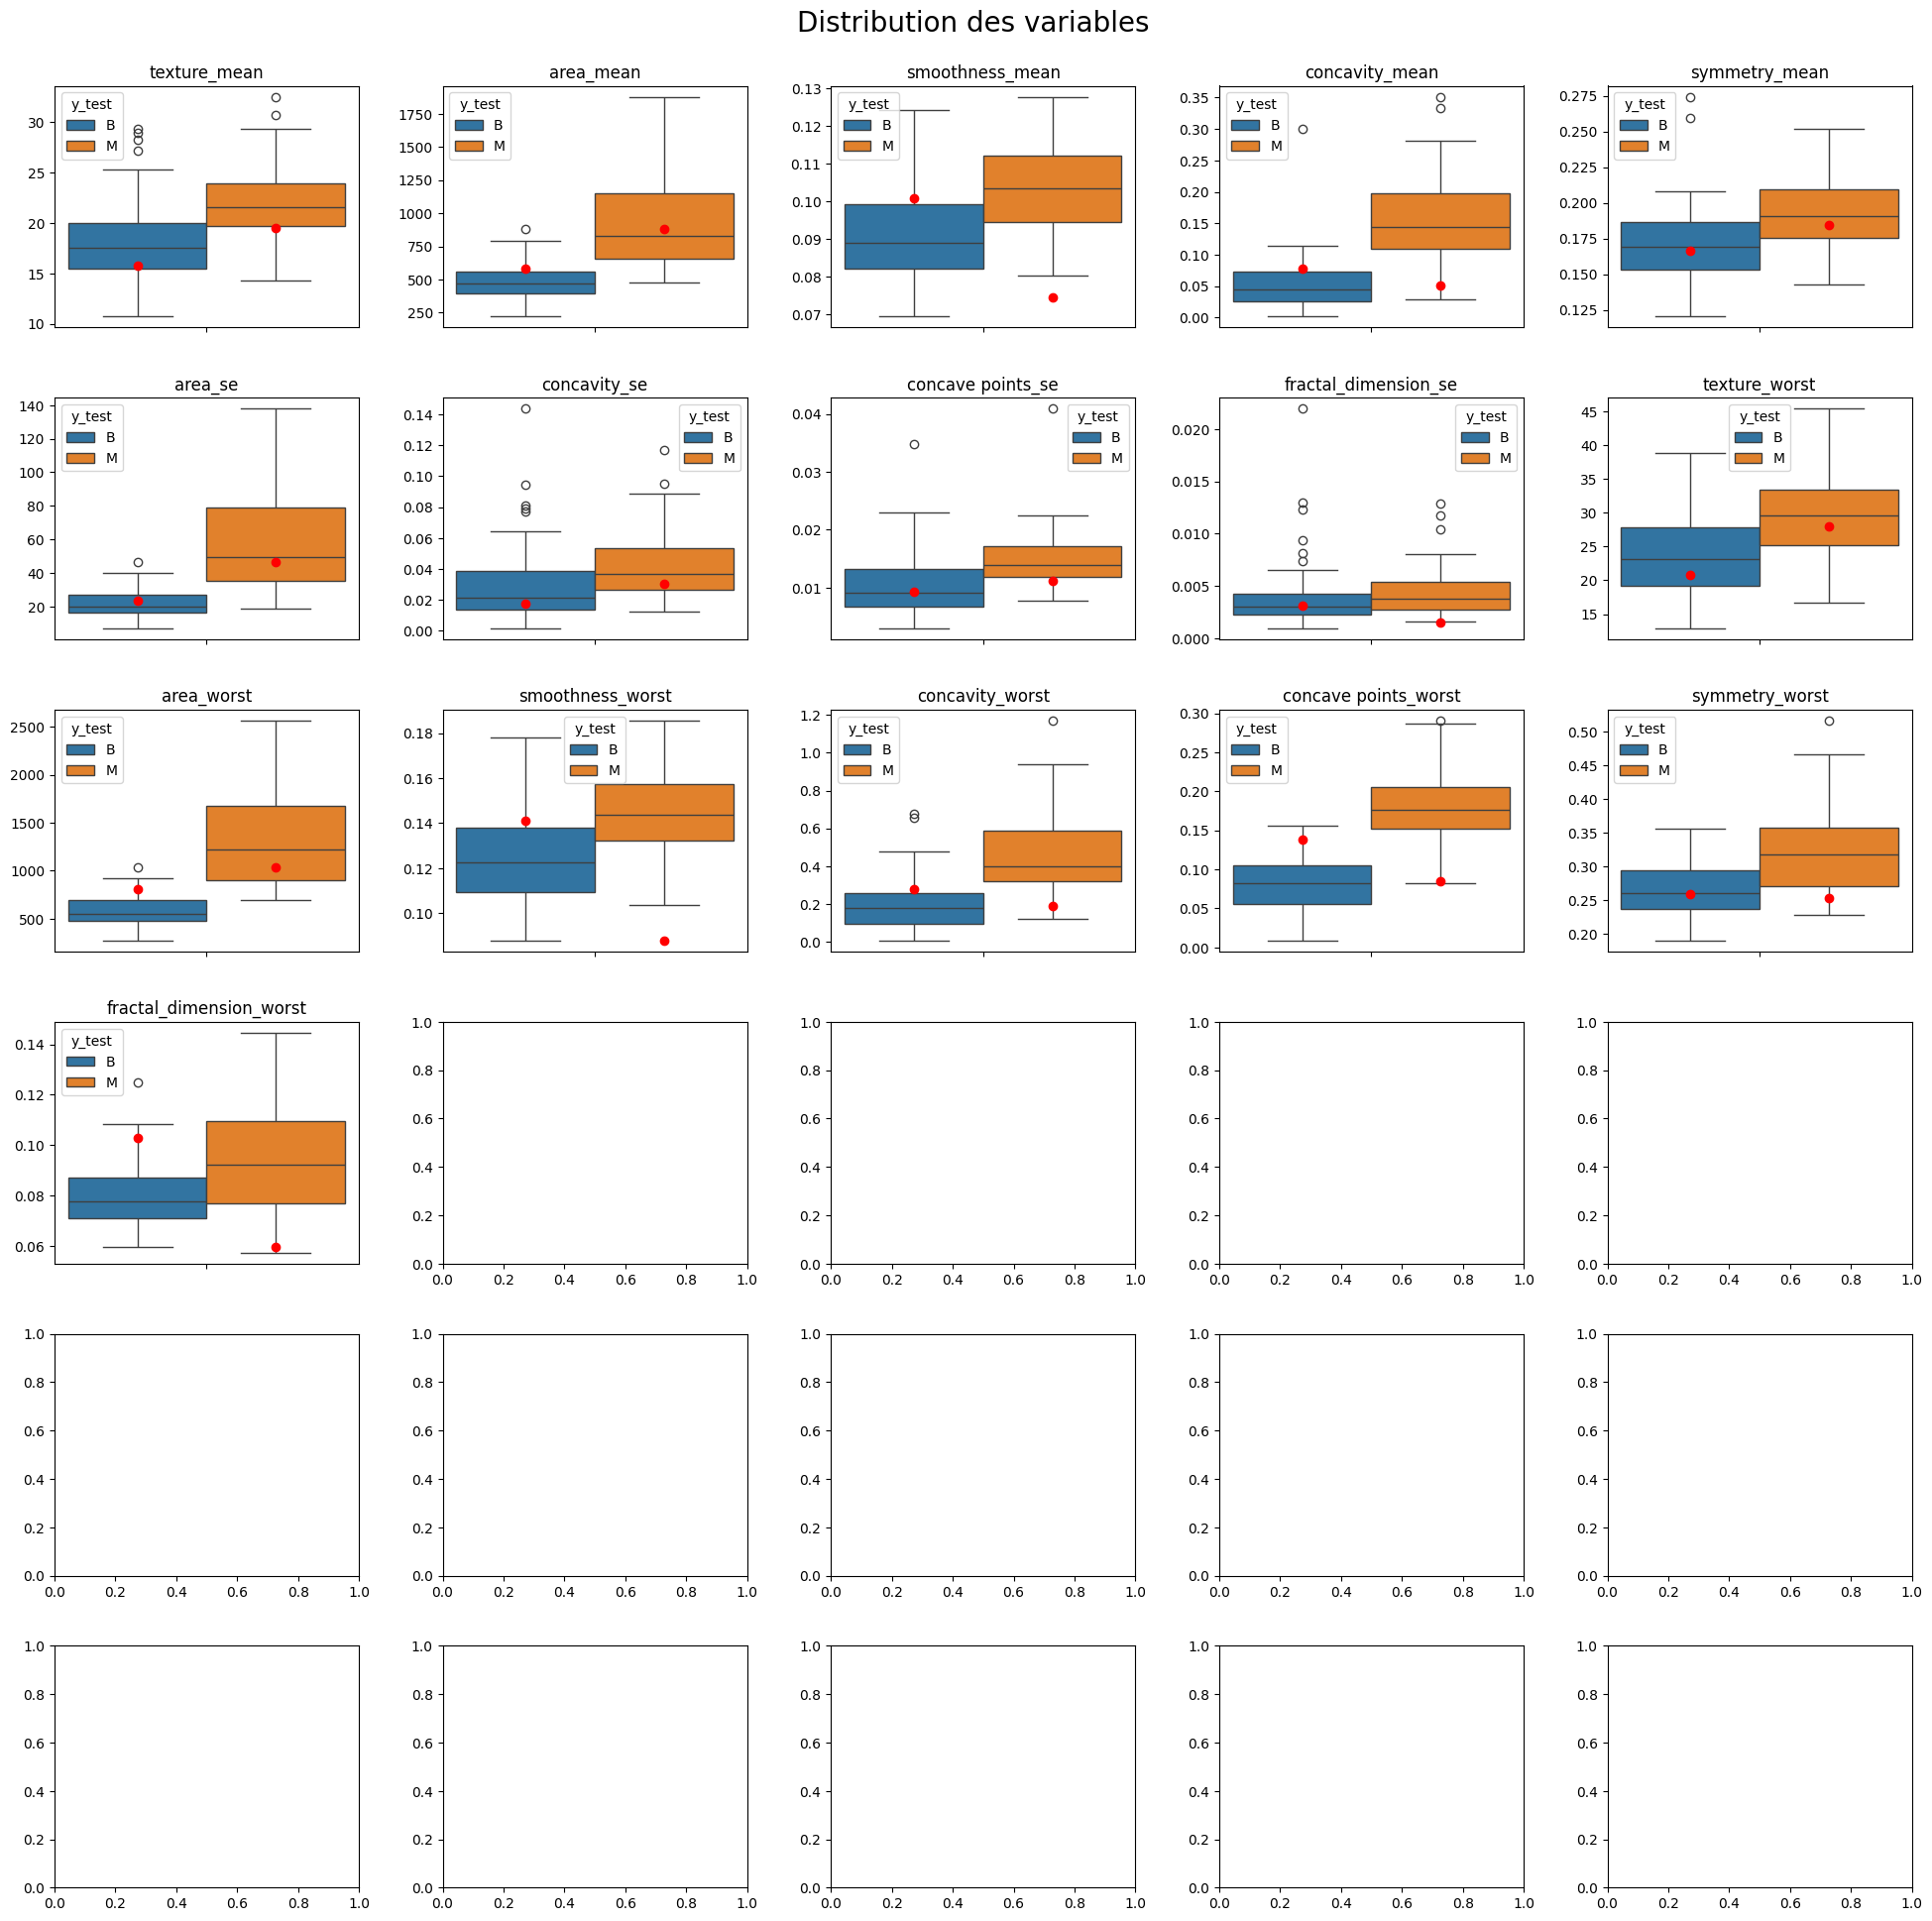

In [190]:
'''
Observation des data ayant une mauvaise prediction sur le jeu de test

si prediction de B alors que M sur le jeu de tets alors affichage des points sur le boxplot test filtré sur M
'''

df_test_predict_rl = pd.DataFrame((y_test.values, y_pred_rl)).T.rename(columns={0: 'y_test', 1: 'y_pred'})
df_test_predict_rl = pd.concat([df_test_predict_rl,X_test.reset_index(drop=True)], axis= 1)

bad_predict_M_rl = df_test_predict_rl[(df_test_predict_rl['y_test'] == 'M') & (df_test_predict_rl['y_pred'] != 'M')]
bad_predict_B_rl = df_test_predict_rl[(df_test_predict_rl['y_test'] == 'B') & (df_test_predict_rl['y_pred'] != 'B')]


colors = [
    'red', 'green', 'orange', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink',
    'brown', 'violet', 'lime', 'olive', 'maroon', 'navy', 'teal', 'grey', 'beige', 'coral',
    'turquoise', 'lavender', 'gold', 'silver', 'plum', 'indigo', 'peach', 'mint', 'azure', 'amber'
]

fig, axes = plt.subplots(6, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_test_predict_rl.columns[2:]):
    sns.boxplot(data=df_test_predict_rl, y= col,  ax=axes[i//5, i%5], hue='y_test')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')
    
    k = 0
    for _, row in bad_predict_M_rl.iterrows():
    
        axes[i//5, i%5].scatter(x=-0.2, y=row[col], color=colors[k], zorder=5)
        k += 1

    l = 0
    for _, row in bad_predict_B_rl.iterrows():
    
        axes[i//5, i%5].scatter(x=0.2, y=row[col], color=colors[l], zorder=5)
        k += 1
        
plt.show()

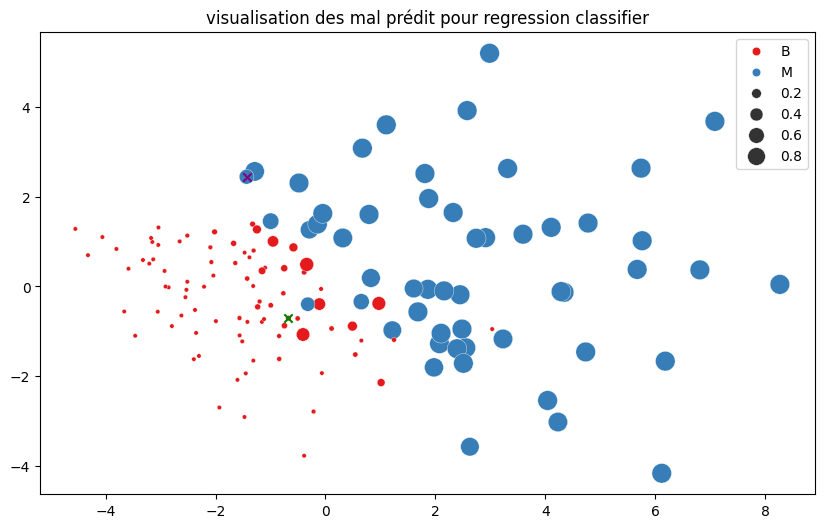

In [191]:
'''
Visualisation des mal prédit
'''

misclassified_M_indices_rl = bad_predict_M_rl.index
misclassified_B_indices_rl = bad_predict_B_rl.index

y_probs_rl = best_model_reg_log.predict_proba(X_test)

pca_rl = PCA(n_components=2)

pipeline_PCA_rl = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Reg_log', pca_rl)
])

# transformation des données
X_pca_rl = pipeline_PCA_rl.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x= X_pca_rl[:, 0], y= X_pca_rl[:, 1], palette='Set1', hue= y_pred_rl, size= y_probs_rl[:, 1], sizes=(10, 200))

plt.scatter(X_pca_rl[misclassified_M_indices_rl, 0], X_pca_rl[misclassified_M_indices_rl, 1], c='green', marker='x', label='B au lieu de M')

plt.scatter(X_pca_rl[misclassified_B_indices_rl, 0], X_pca_rl[misclassified_B_indices_rl, 1], c='purple', marker='x', label='M au lieu de B')


plt.title('visualisation des mal prédit pour regression classifier')


# for idx in misclassified_M_indices_rl:
#     plt.annotate(f'Prob d\'être M alors que reel M: {y_probs_rl[idx, 1]:.2f}', (X_pca_rl[idx, 0], X_pca_rl[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')

# for idx in misclassified_B_indices_rl:
#     plt.annotate(f'Prob d\'être B alors que reel B: {y_probs_rl[idx, 0]:.2f}', (X_pca_rl[idx, 0], X_pca_rl[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')


plt.show()

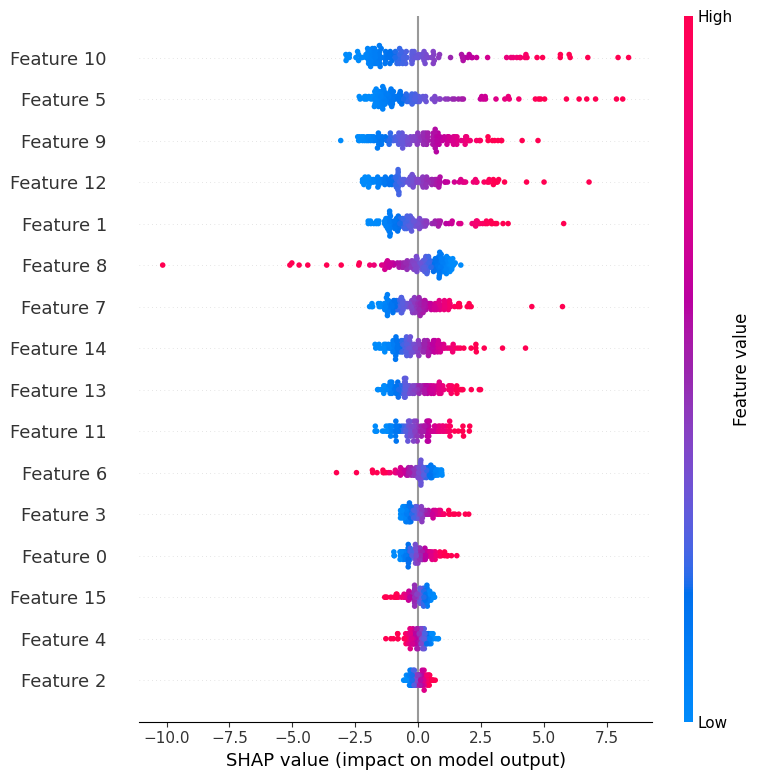

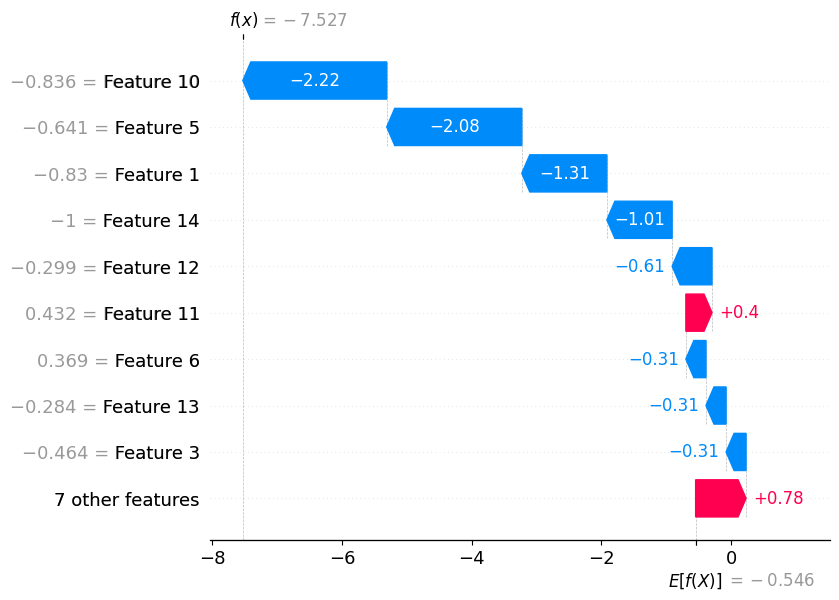

In [305]:
import shap

model_final = best_model_reg_log.named_steps['model_regression_logistic']

# Transformez les données d'entrée en utilisant le pipeline, mais sans le modèle final
X_test_transformed = best_model_reg_log.named_steps['preprocessor'].transform(X_test)

# Créez un explainer SHAP pour le modèle final
explainer = shap.Explainer(model_final, X_test_transformed)

# Calculez les valeurs SHAP pour l'ensemble de test transformé
shap_values = explainer(X_test_transformed)

# Visualisation des valeurs SHAP pour toutes les caractéristiques
shap.summary_plot(shap_values, X_test_transformed)

# Visualisation des valeurs SHAP pour une seule prédiction
shap.plots.waterfall(shap_values[0])

### 6.2 - knn

#### 6.2.0 - Definition du modele et du pipeline

In [192]:
model_knn = KNeighborsClassifier()

In [193]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_knn', model_knn)    
])

#### 6.2.1 - Définition des hyperparametres et du randomsearchCV

In [194]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_knn = {
    'model_knn__n_neighbors': randint(1, 50),              # Number of neighbors
    'model_knn__weights': ['uniform', 'distance'],         # Weight function used in prediction
    'model_knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'model_knn__leaf_size': randint(10, 50),               # Leaf size passed to BallTree or KDTree
    'model_knn__p': [1, 2]                                 # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

In [195]:
# Configurer la recherche aléatoire
random_search_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # scoring= make_scorer(recall_score, pos_label = 'M')     
    # error_score='raise'
)

#### 6.2.2 - Entrainement et prediction du modele

In [196]:
random_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['texture_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'concavity_mean',
                                                                                'symmetry_mean',
                                                                                'area_se',
                                                                                'concavity_se',
                                                                                'concave '
                                                                                'points_se',
                                                                                'fractal_dimension_se',
                                                                                'texture_worst',
                                                                                'area_worst',
                                                                                'smoothness_wo...
                   param_distributions={'model_knn__algorithm': ['auto',
                                                                 'ball_tree',
                                                                 'kd_tree',
                                                                 'brute'],
                                        'model_knn__leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002798250B770>,
                                        'model_knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000279FAAB51C0>,
                                        'model_knn__p': [1, 2],
                                        'model_knn__weights': ['uniform',
                                                               'distance']},
                   random_state=42, verbose=2)

In [197]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_knn.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_knn = random_search_knn.best_estimator_
test_score_knn = best_model_knn.score(X_test, y_test)

Best parameters found:  {'model_knn__algorithm': 'ball_tree', 'model_knn__leaf_size': 45, 'model_knn__n_neighbors': 14, 'model_knn__p': 1, 'model_knn__weights': 'distance'}


In [198]:
y_pred_knn = best_model_knn.predict(X_test)

#### 6.2.3 - Mesure de l'efficacité du modele

In [199]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn:.4f}')

Accuracy: 0.9568


In [200]:
class_report_knn = classification_report(y_test, y_pred_knn)

print(class_report_knn)

              precision    recall  f1-score   support

           B       0.93      1.00      0.97        86
           M       1.00      0.89      0.94        53

    accuracy                           0.96       139
   macro avg       0.97      0.94      0.95       139
weighted avg       0.96      0.96      0.96       139



In [201]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_knn, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.97321429 0.95495495 0.97297297 0.94594595 0.93693694]
Score moyen :  0.9568050193050193
Écart-type des scores :  0.014468929878891519


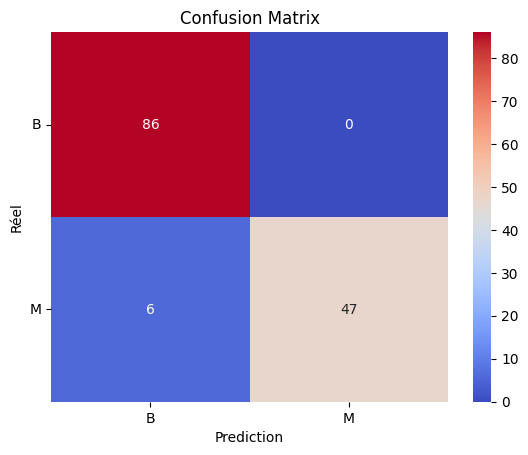

In [202]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.xticks([0.5, 1.5], ['B', 'M'])
plt.yticks([0.5, 1.5], ['B', 'M'], rotation=0)
plt.title('Confusion Matrix')
plt.show()

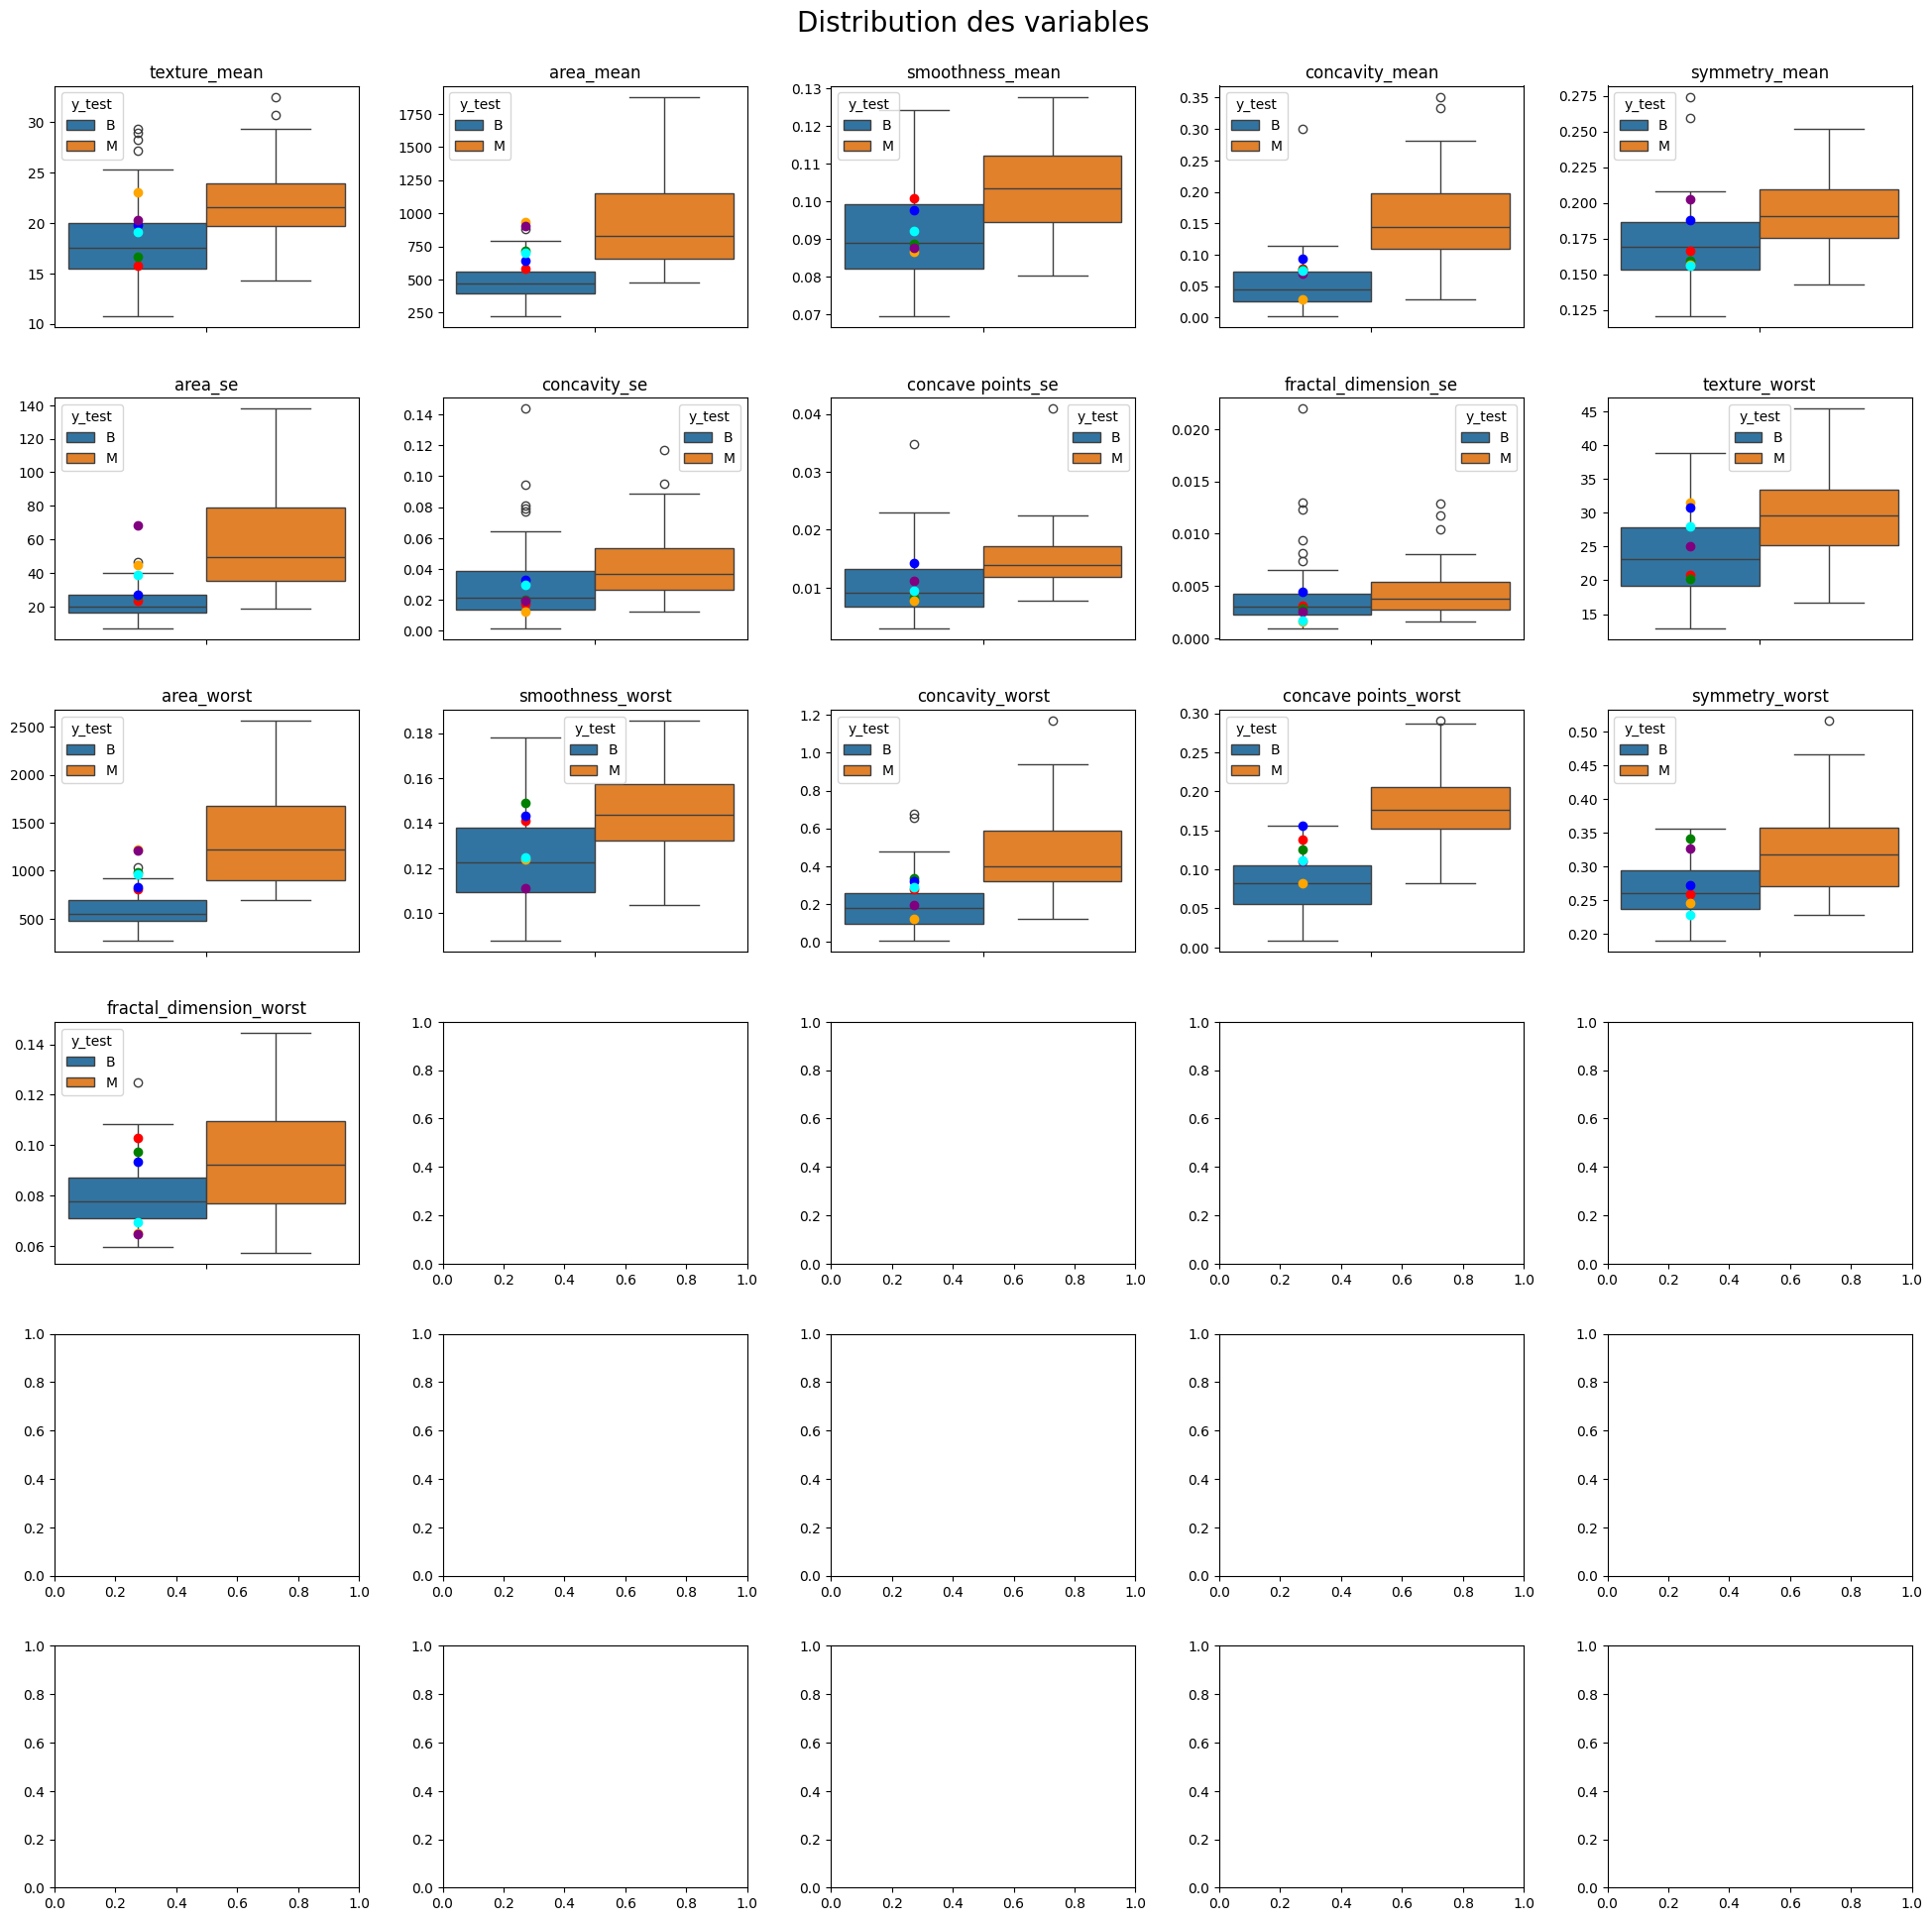

In [203]:
'''
Observation des data ayant une mauvaise prediction sur le jeu de test

si prediction de B alors que M sur le jeu de tets alors affichage des points sur le boxplot test filtré sur M
'''

df_test_predict_knn = pd.DataFrame((y_test.values, y_pred_knn)).T.rename(columns={0: 'y_test', 1: 'y_pred'})
df_test_predict_knn = pd.concat([df_test_predict_knn,X_test.reset_index(drop=True)], axis= 1)

bad_predict_M_knn = df_test_predict_knn[(df_test_predict_knn['y_test'] == 'M') & (df_test_predict_knn['y_pred'] != 'M')]
bad_predict_B_knn = df_test_predict_knn[(df_test_predict_knn['y_test'] == 'B') & (df_test_predict_knn['y_pred'] != 'B')]


colors = [
    'red', 'green', 'orange', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink',
    'brown', 'violet', 'lime', 'olive', 'maroon', 'navy', 'teal', 'grey', 'beige', 'coral',
    'turquoise', 'lavender', 'gold', 'silver', 'plum', 'indigo', 'peach', 'mint', 'azure', 'amber'
]

fig, axes = plt.subplots(6, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_test_predict_knn.columns[2:]):
    sns.boxplot(data=df_test_predict_knn, y= col,  ax=axes[i//5, i%5], hue='y_test')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')
    
    k = 0
    for _, row in bad_predict_M_knn.iterrows():
    
        axes[i//5, i%5].scatter(x=-0.2, y=row[col], color=colors[k], zorder=5)
        k += 1

    l = 0
    for _, row in bad_predict_B_knn.iterrows():
    
        axes[i//5, i%5].scatter(x=0.2, y=row[col], color=colors[l], zorder=5)
        k += 1
        
plt.show()

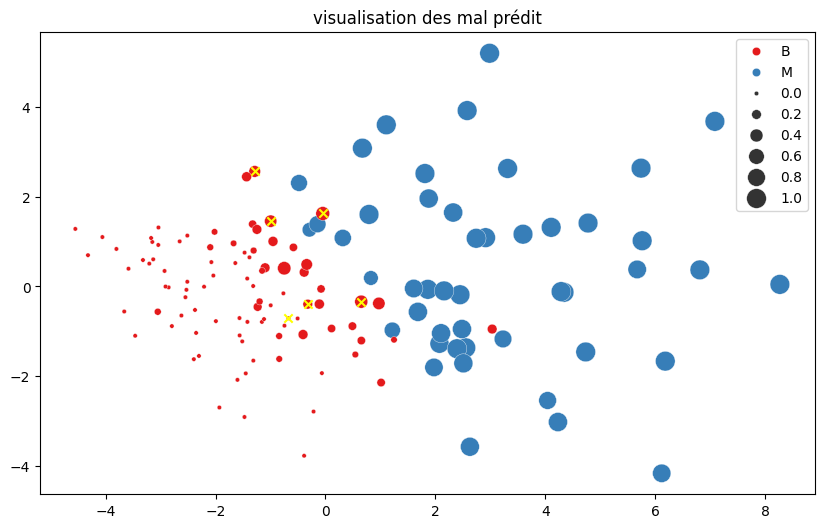

In [204]:
'''
Visualisation des mal prédit
'''

misclassified_M_indices_knn = bad_predict_M_knn.index
misclassified_B_indices_knn = bad_predict_B_knn.index

y_probs_knn = best_model_knn.predict_proba(X_test)


pca_knn = PCA(n_components=2)

pipeline_PCA_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', pca_knn)
])

# transformation des données
X_pca_knn = pipeline_PCA_knn.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x= X_pca_knn[:, 0], y= X_pca_knn[:, 1], palette='Set1', hue= y_pred_knn, size= y_probs_knn[:, 1], sizes=(10, 200))

plt.scatter(X_pca_knn[misclassified_M_indices_knn, 0], X_pca_knn[misclassified_M_indices_knn, 1], c='yellow', marker='x', label='B au lieu de M')

plt.scatter(X_pca_knn[misclassified_B_indices_knn, 0], X_pca_knn[misclassified_B_indices_knn, 1], c='purple', marker='x', label='M au lieu de B')


plt.title('visualisation des mal prédit')


# for idx in misclassified_M_indices_knn:
#     plt.annotate(f'Prob d\'être M alors que reel M: {y_probs_knn[idx, 1]:.2f}', (X_pca_knn[idx, 0], X_pca_knn[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')

# for idx in misclassified_B_indices_knn:
#     plt.annotate(f'Prob d\'être B alors que reel B: {y_probs_knn[idx, 0]:.2f}', (X_pca_knn[idx, 0], X_pca_knn[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')


plt.show()

### 6.3 - Random forest classifier

#### 6.3.0 - Definition du modele et du pipeline

In [205]:
RFC = RandomForestClassifier()

In [206]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RFC)
])

#### 6.3.1 - Définition des hyperparametres et du randomsearchCV

In [207]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_rfc = {
    'random_forest__n_estimators': randint(10, 200),
    'random_forest__max_features': ['sqrt', 'log2'],
    'random_forest__max_depth': randint(1, 20),
    'random_forest__min_samples_split': randint(2, 20),
    'random_forest__min_samples_leaf': randint(1, 20),
    'random_forest__bootstrap': [True, False]
}

In [208]:
# Configurer la recherche aléatoire
random_search_rfc = RandomizedSearchCV(
    estimator=pipeline_rfc,
    param_distributions=param_dist_rfc,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # scoring= make_scorer(recall_score, pos_label = 'B')    
    # error_score='raise'
)

#### 6.3.2 - Entrainement et prediction du modele

In [209]:
# Exécuter la recherche aléatoire pour entrainement du modele
random_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['texture_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'concavity_mean',
                                                                                'symmetry_mean',
                                                                                'area_se',
                                                                                'concavity_se',
                                                                                'concave '
                                                                                'points_se',
                                                                                'fractal_dimension_se',
                                                                                'texture_worst',
                                                                                'area_worst',
                                                                                'smoothness_wo...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002798550B8C0>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002798550A360>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002798215BA40>},
                   random_state=42, verbose=2)

In [210]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_rfc.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_rfc = random_search_rfc.best_estimator_
test_score_rfc = best_model_rfc.score(X_test, y_test)


''' Vérifier avec Romain car pas très clair'''
# # récupération du meilleur model pour entrainement et mesure du modele
# best_model_rf = best_model_rfc['random_forest']

Best parameters found:  {'random_forest__bootstrap': False, 'random_forest__max_depth': 5, 'random_forest__max_features': 'log2', 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 156}


' Vérifier avec Romain car pas très clair'

In [211]:
y_pred_rfc = best_model_rfc.predict(X_test)

#### 6.3.2 - Mesure de l'efficacité du modele

In [212]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(f'Accuracy: {accuracy_rfc:.4f}')

Accuracy: 0.9712


In [213]:
class_report_rfc = classification_report(y_test, y_pred_rfc)

print(class_report_rfc)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        86
           M       0.98      0.94      0.96        53

    accuracy                           0.97       139
   macro avg       0.97      0.97      0.97       139
weighted avg       0.97      0.97      0.97       139



In [214]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_rfc, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.94642857 0.95495495 0.99099099 0.97297297 0.96396396]
Score moyen :  0.9658622908622909
Écart-type des scores :  0.015376972672631009


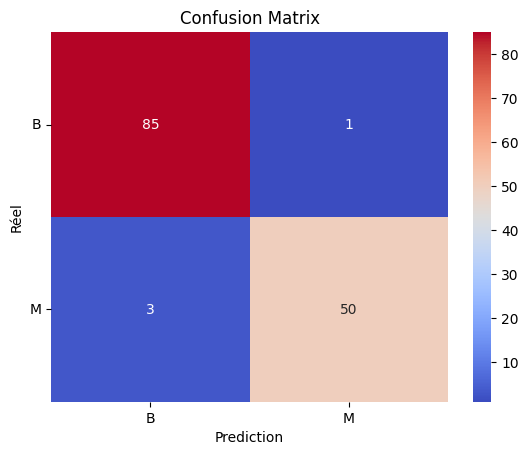

In [215]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.xticks([0.5, 1.5], ['B', 'M'])
plt.yticks([0.5, 1.5], ['B', 'M'], rotation=0)
plt.title('Confusion Matrix')
plt.show()

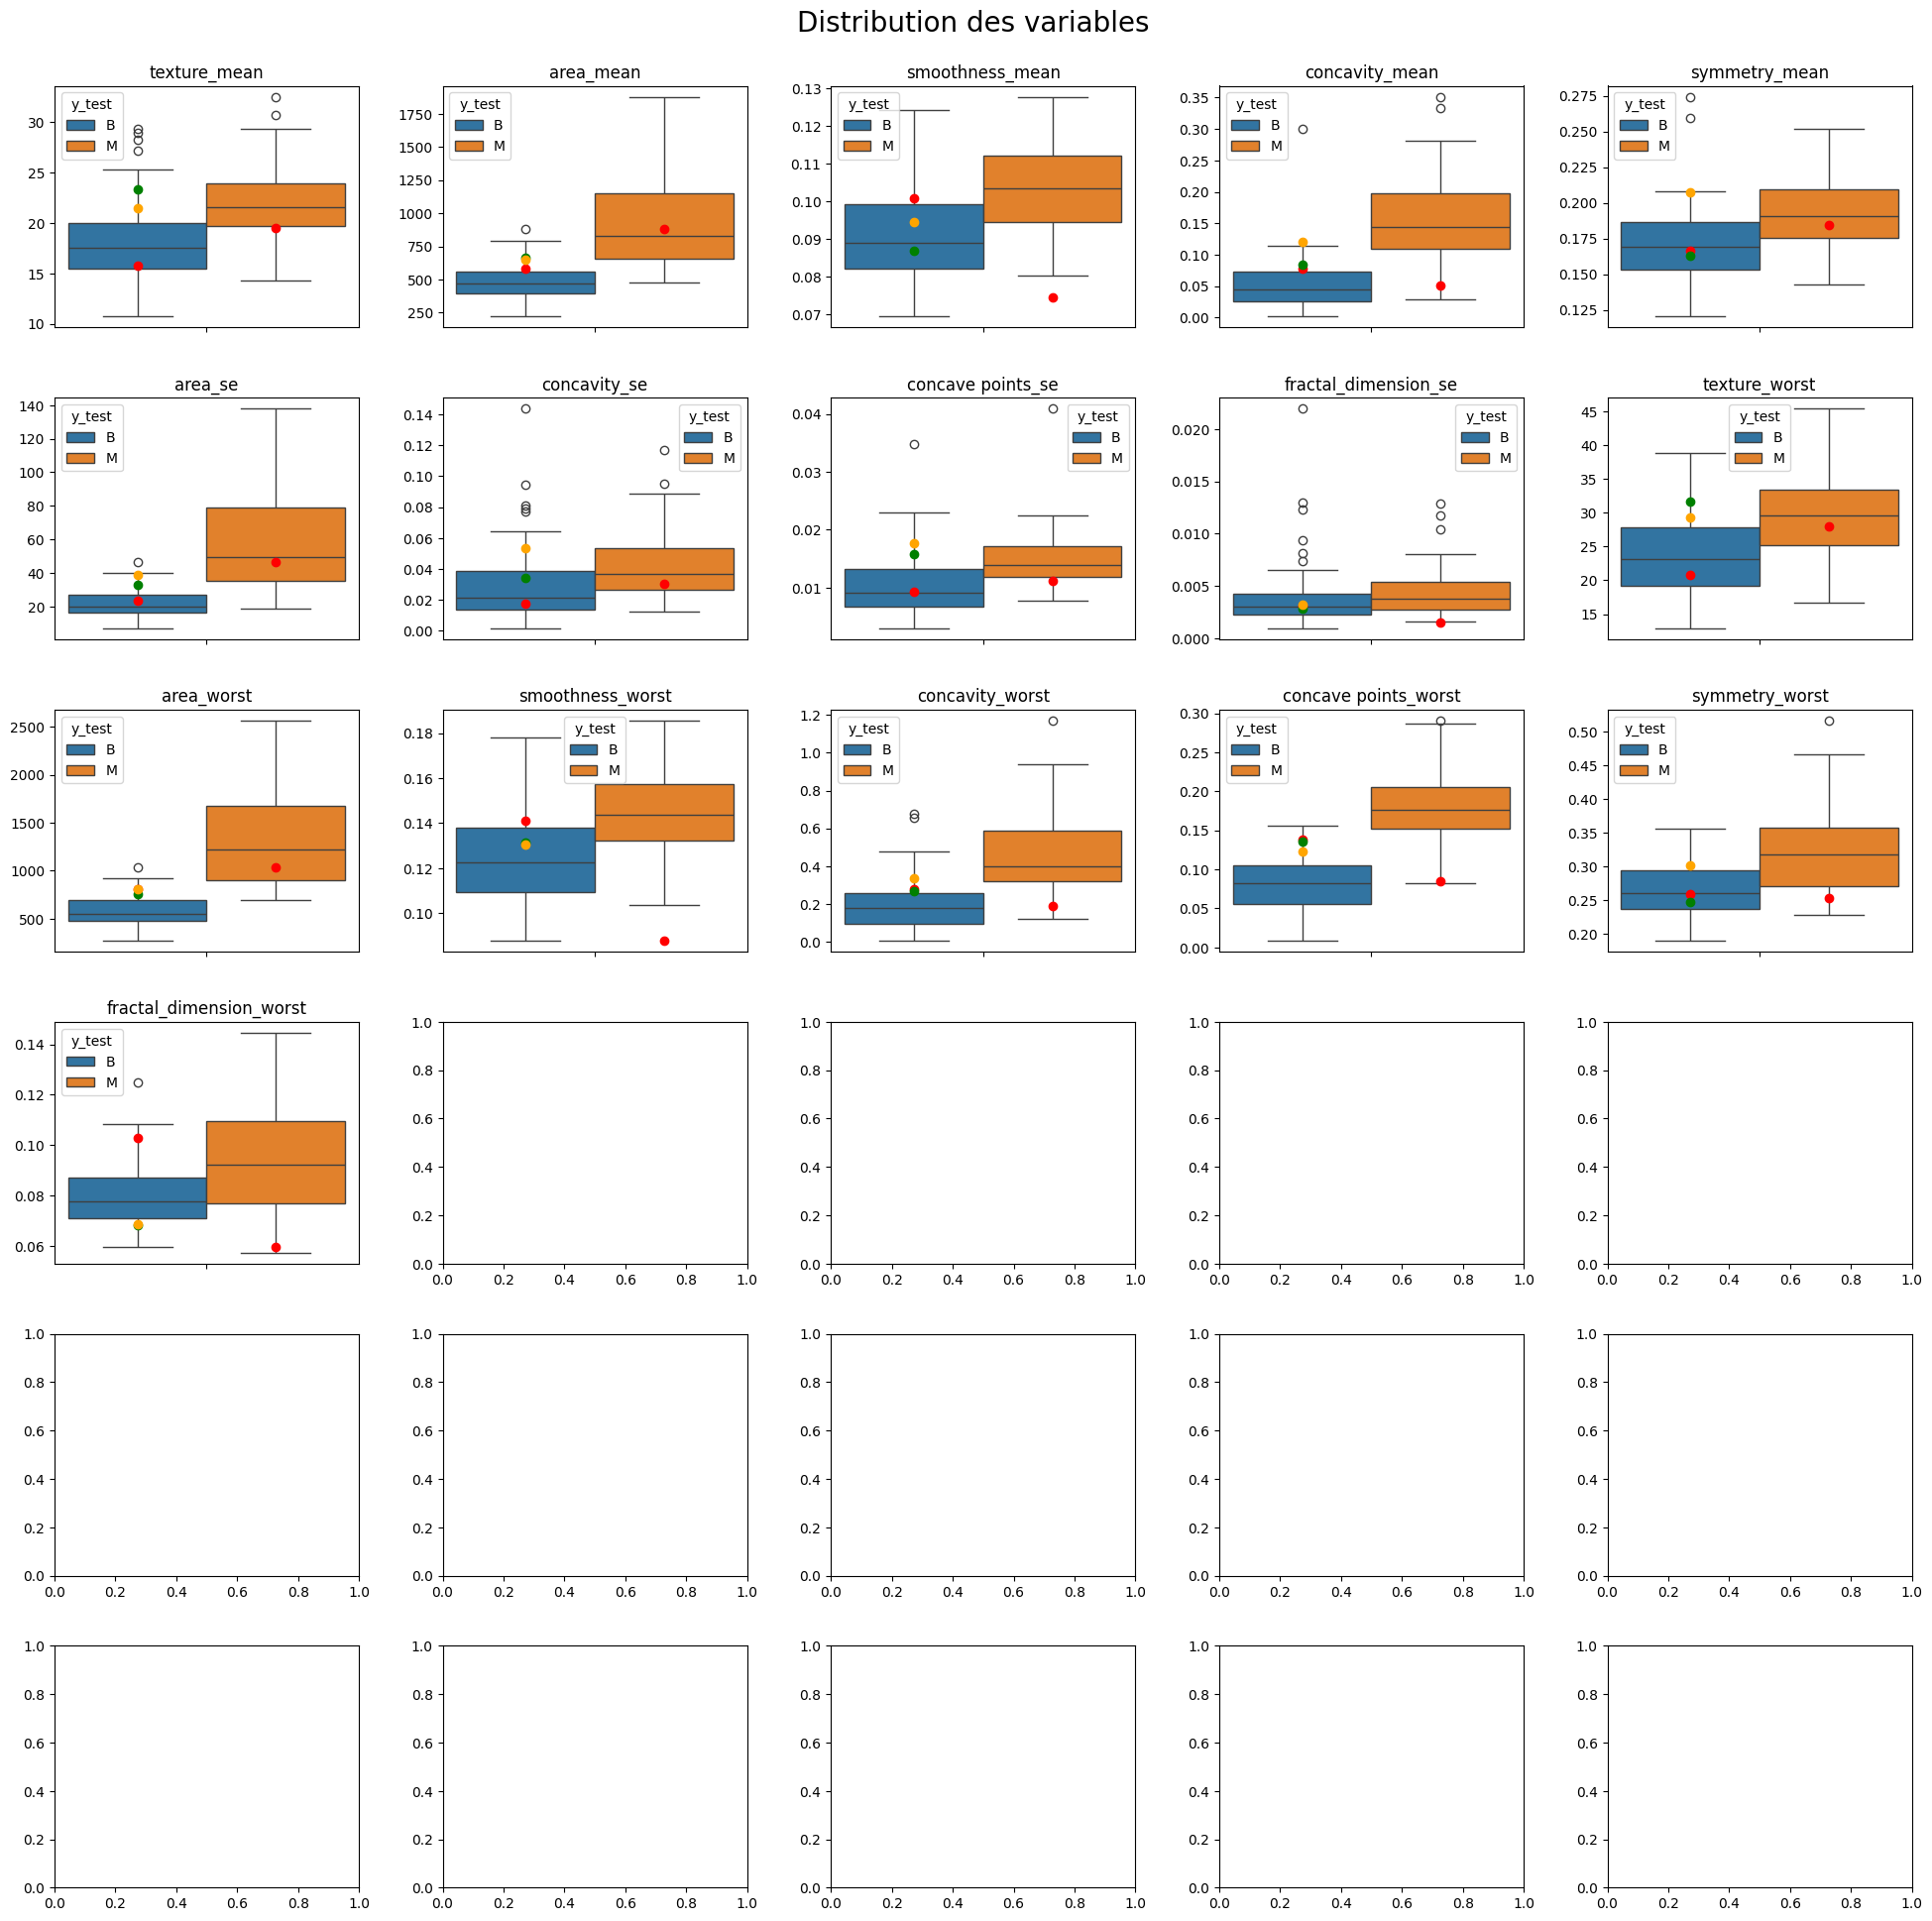

In [216]:
'''
Observation des data ayant une mauvaise prediction sur le jeu de test

si prediction de B alors que M sur le jeu de tets alors affichage des points sur le boxplot test filtré sur M
'''

df_test_predict_rfc = pd.DataFrame((y_test.values, y_pred_rfc)).T.rename(columns={0: 'y_test', 1: 'y_pred'})
df_test_predict_rfc = pd.concat([df_test_predict_rfc,X_test.reset_index(drop=True)], axis= 1)

bad_predict_M_rfc = df_test_predict_rfc[(df_test_predict_rfc['y_test'] == 'M') & (df_test_predict_rfc['y_pred'] != 'M')]
bad_predict_B_rfc = df_test_predict_rfc[(df_test_predict_rfc['y_test'] == 'B') & (df_test_predict_rfc['y_pred'] != 'B')]


colors = [
    'red', 'green', 'orange', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink',
    'brown', 'violet', 'lime', 'olive', 'maroon', 'navy', 'teal', 'grey', 'beige', 'coral',
    'turquoise', 'lavender', 'gold', 'silver', 'plum', 'indigo', 'peach', 'mint', 'azure', 'amber'
]

fig, axes = plt.subplots(6, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_test_predict_rfc.columns[2:]):
    sns.boxplot(data=df_test_predict_rfc, y= col,  ax=axes[i//5, i%5], hue='y_test')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')
    
    k = 0
    for _, row in bad_predict_M_rfc.iterrows():
    
        axes[i//5, i%5].scatter(x=-0.2, y=row[col], color=colors[k], zorder=5)
        k += 1

    l = 0
    for _, row in bad_predict_B_rfc.iterrows():
    
        axes[i//5, i%5].scatter(x=0.2, y=row[col], color=colors[l], zorder=5)
        k += 1
        
plt.show()

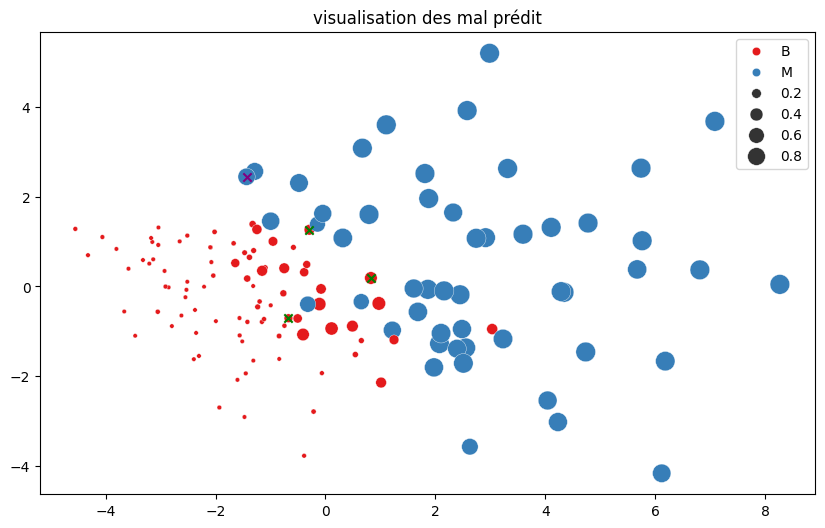

In [217]:
'''
Visualisation des mal prédit
'''

misclassified_M_indices_rfc = bad_predict_M_rfc.index
misclassified_B_indices_rfc = bad_predict_B_rfc.index

y_probs_rfc = best_model_rfc.predict_proba(X_test)


pca_rfc = PCA(n_components=2)

pipeline_PCA_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest_classifier', pca_rfc)
])

# transformation des données
X_pca_rfc = pipeline_PCA_rfc.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x= X_pca_rfc[:, 0], y= X_pca_rfc[:, 1], palette='Set1', hue= y_pred_rfc, size= y_probs_rfc[:, 1], sizes=(10, 200))

plt.scatter(X_pca_rfc[misclassified_M_indices_rfc, 0], X_pca_rfc[misclassified_M_indices_rfc, 1], c='green', marker='x',  label='B au lieu de M')

plt.scatter(X_pca_rfc[misclassified_B_indices_rfc, 0], X_pca_rfc[misclassified_B_indices_rfc, 1], c='purple', marker='x', label='M au lieu de B')


plt.title('visualisation des mal prédit')


# for idx in misclassified_M_indices_rfc:
#     plt.annotate(f'Prob d\'être M alors que reel M: {y_probs_rfc[idx, 1]:.2f}', (X_pca_rfc[idx, 0], X_pca_rfc[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')

# for idx in misclassified_B_indices_rfc:
#     plt.annotate(f'Prob d\'être B alors que reel B: {y_probs_rfc[idx, 0]:.2f}', (X_pca_rfc[idx, 0], X_pca_rfc[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')


plt.show()

In [257]:
model_final = best_model_rfc.named_steps['model_rfc']

# Transformez les données d'entrée en utilisant le pipeline, mais sans le modèle final
X_test_transformed = best_model_knn.named_steps['preprocessor'].transform(X_test)

# Créez un explainer SHAP pour le modèle final
explainer = shap.Explainer(model_final, X_test_transformed)

# Calculez les valeurs SHAP pour l'ensemble de test transformé
shap_values = explainer(X_test_transformed)

# Visualisation des valeurs SHAP pour toutes les caractéristiques
shap.summary_plot(shap_values, X_test_transformed)

# Visualisation des valeurs SHAP pour une seule prédiction
shap.plots.waterfall(shap_values[0])

KeyError: 'model_rfc'

### 6.4 - MLPClassifier de sk-learn

#### 6.4.0 - Definition du modele et du pipeline

In [218]:
model_MLPC = MLPClassifier(max_iter= 500)

In [219]:
pipeline_MLPC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Multi_Layer_Perceptron_Classifier', model_MLPC)
])

#### 6.4.1 - Définition des hyperparametres et du randomsearchCV

In [220]:
param_dist_mlpc = {
    'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': [(50,), (100,), (100, 100), (100, 100, 100)],
    'Multi_Layer_Perceptron_Classifier__activation': ['relu', 'logistic'],
    'Multi_Layer_Perceptron_Classifier__solver': ['sgd', 'adam'],
    'Multi_Layer_Perceptron_Classifier__alpha': uniform(0.0001, 0.1),
    'Multi_Layer_Perceptron_Classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'Multi_Layer_Perceptron_Classifier__max_iter': randint(200, 500)
}

In [221]:
random_search_mlpc = RandomizedSearchCV(
    estimator=pipeline_MLPC,
    param_distributions=param_dist_mlpc,
    n_iter=500,  
    cv=5,        
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # scoring= make_scorer(recall_score, pos_label = 'M')    
    # error_score='raise'
)

#### 6.4.2 - Entrainement et prediction du modele

In [222]:
random_search_mlpc.fit(X_train, y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['texture_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'concavity_mean',
                                                                                'symmetry_mean',
                                                                                'area_se',
                                                                                'concavity_se',
                                                                                'concave '
                                                                                'points_se',
                                                                                'fractal_dimension_se',
                                                                                'texture_worst',
                                                                                'area_worst',
                                                                                'smoothness_wo...
                                        'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': [(50,),
                                                                                                  (100,),
                                                                                                  (100,
                                                                                                   100),
                                                                                                  (100,
                                                                                                   100,
                                                                                                   100)],
                                        'Multi_Layer_Perceptron_Classifier__learning_rate': ['constant',
                                                                                             'invscaling',
                                                                                             'adaptive'],
                                        'Multi_Layer_Perceptron_Classifier__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000279FDD7CE60>,
                                        'Multi_Layer_Perceptron_Classifier__solver': ['sgd',
                                                                                      'adam']},
                   random_state=42, verbose=2)

In [223]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_mlpc.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_MLPC = random_search_mlpc.best_estimator_


Best parameters found:  {'Multi_Layer_Perceptron_Classifier__activation': 'relu', 'Multi_Layer_Perceptron_Classifier__alpha': 0.06685498992914705, 'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': (100,), 'Multi_Layer_Perceptron_Classifier__learning_rate': 'adaptive', 'Multi_Layer_Perceptron_Classifier__max_iter': 363, 'Multi_Layer_Perceptron_Classifier__solver': 'adam'}


In [224]:
y_pred_MLPC = best_model_MLPC.predict(X_test)

#### 6.4.2 - Mesure de l'efficacité du modele

In [225]:
accuracy_MLPC = accuracy_score(y_test, y_pred_MLPC)

print(f'Accuracy: {accuracy_MLPC:.4f}')

Accuracy: 0.9712


In [226]:
class_report_MLPC = classification_report(y_test, y_pred_MLPC)

print(class_report_MLPC)

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        86
           M       0.96      0.96      0.96        53

    accuracy                           0.97       139
   macro avg       0.97      0.97      0.97       139
weighted avg       0.97      0.97      0.97       139



In [227]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(best_model_MLPC, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (363) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores de chaque fold :  [0.98214286 0.97297297 0.96396396 0.97297297 0.99099099]
Score moyen :  0.9766087516087515
Écart-type des scores :  0.009206558106797515


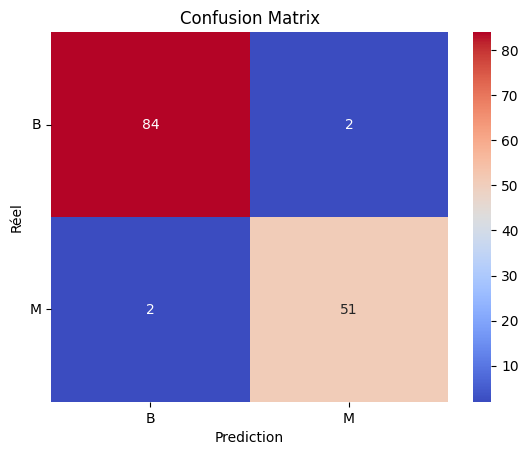

In [228]:
conf_matrix_MLPC = confusion_matrix(y_test, y_pred_MLPC)

sns.heatmap(conf_matrix_MLPC, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.xticks([0.5, 1.5], ['B', 'M'])
plt.yticks([0.5, 1.5], ['B', 'M'], rotation=0)
plt.title('Confusion Matrix')
plt.show()

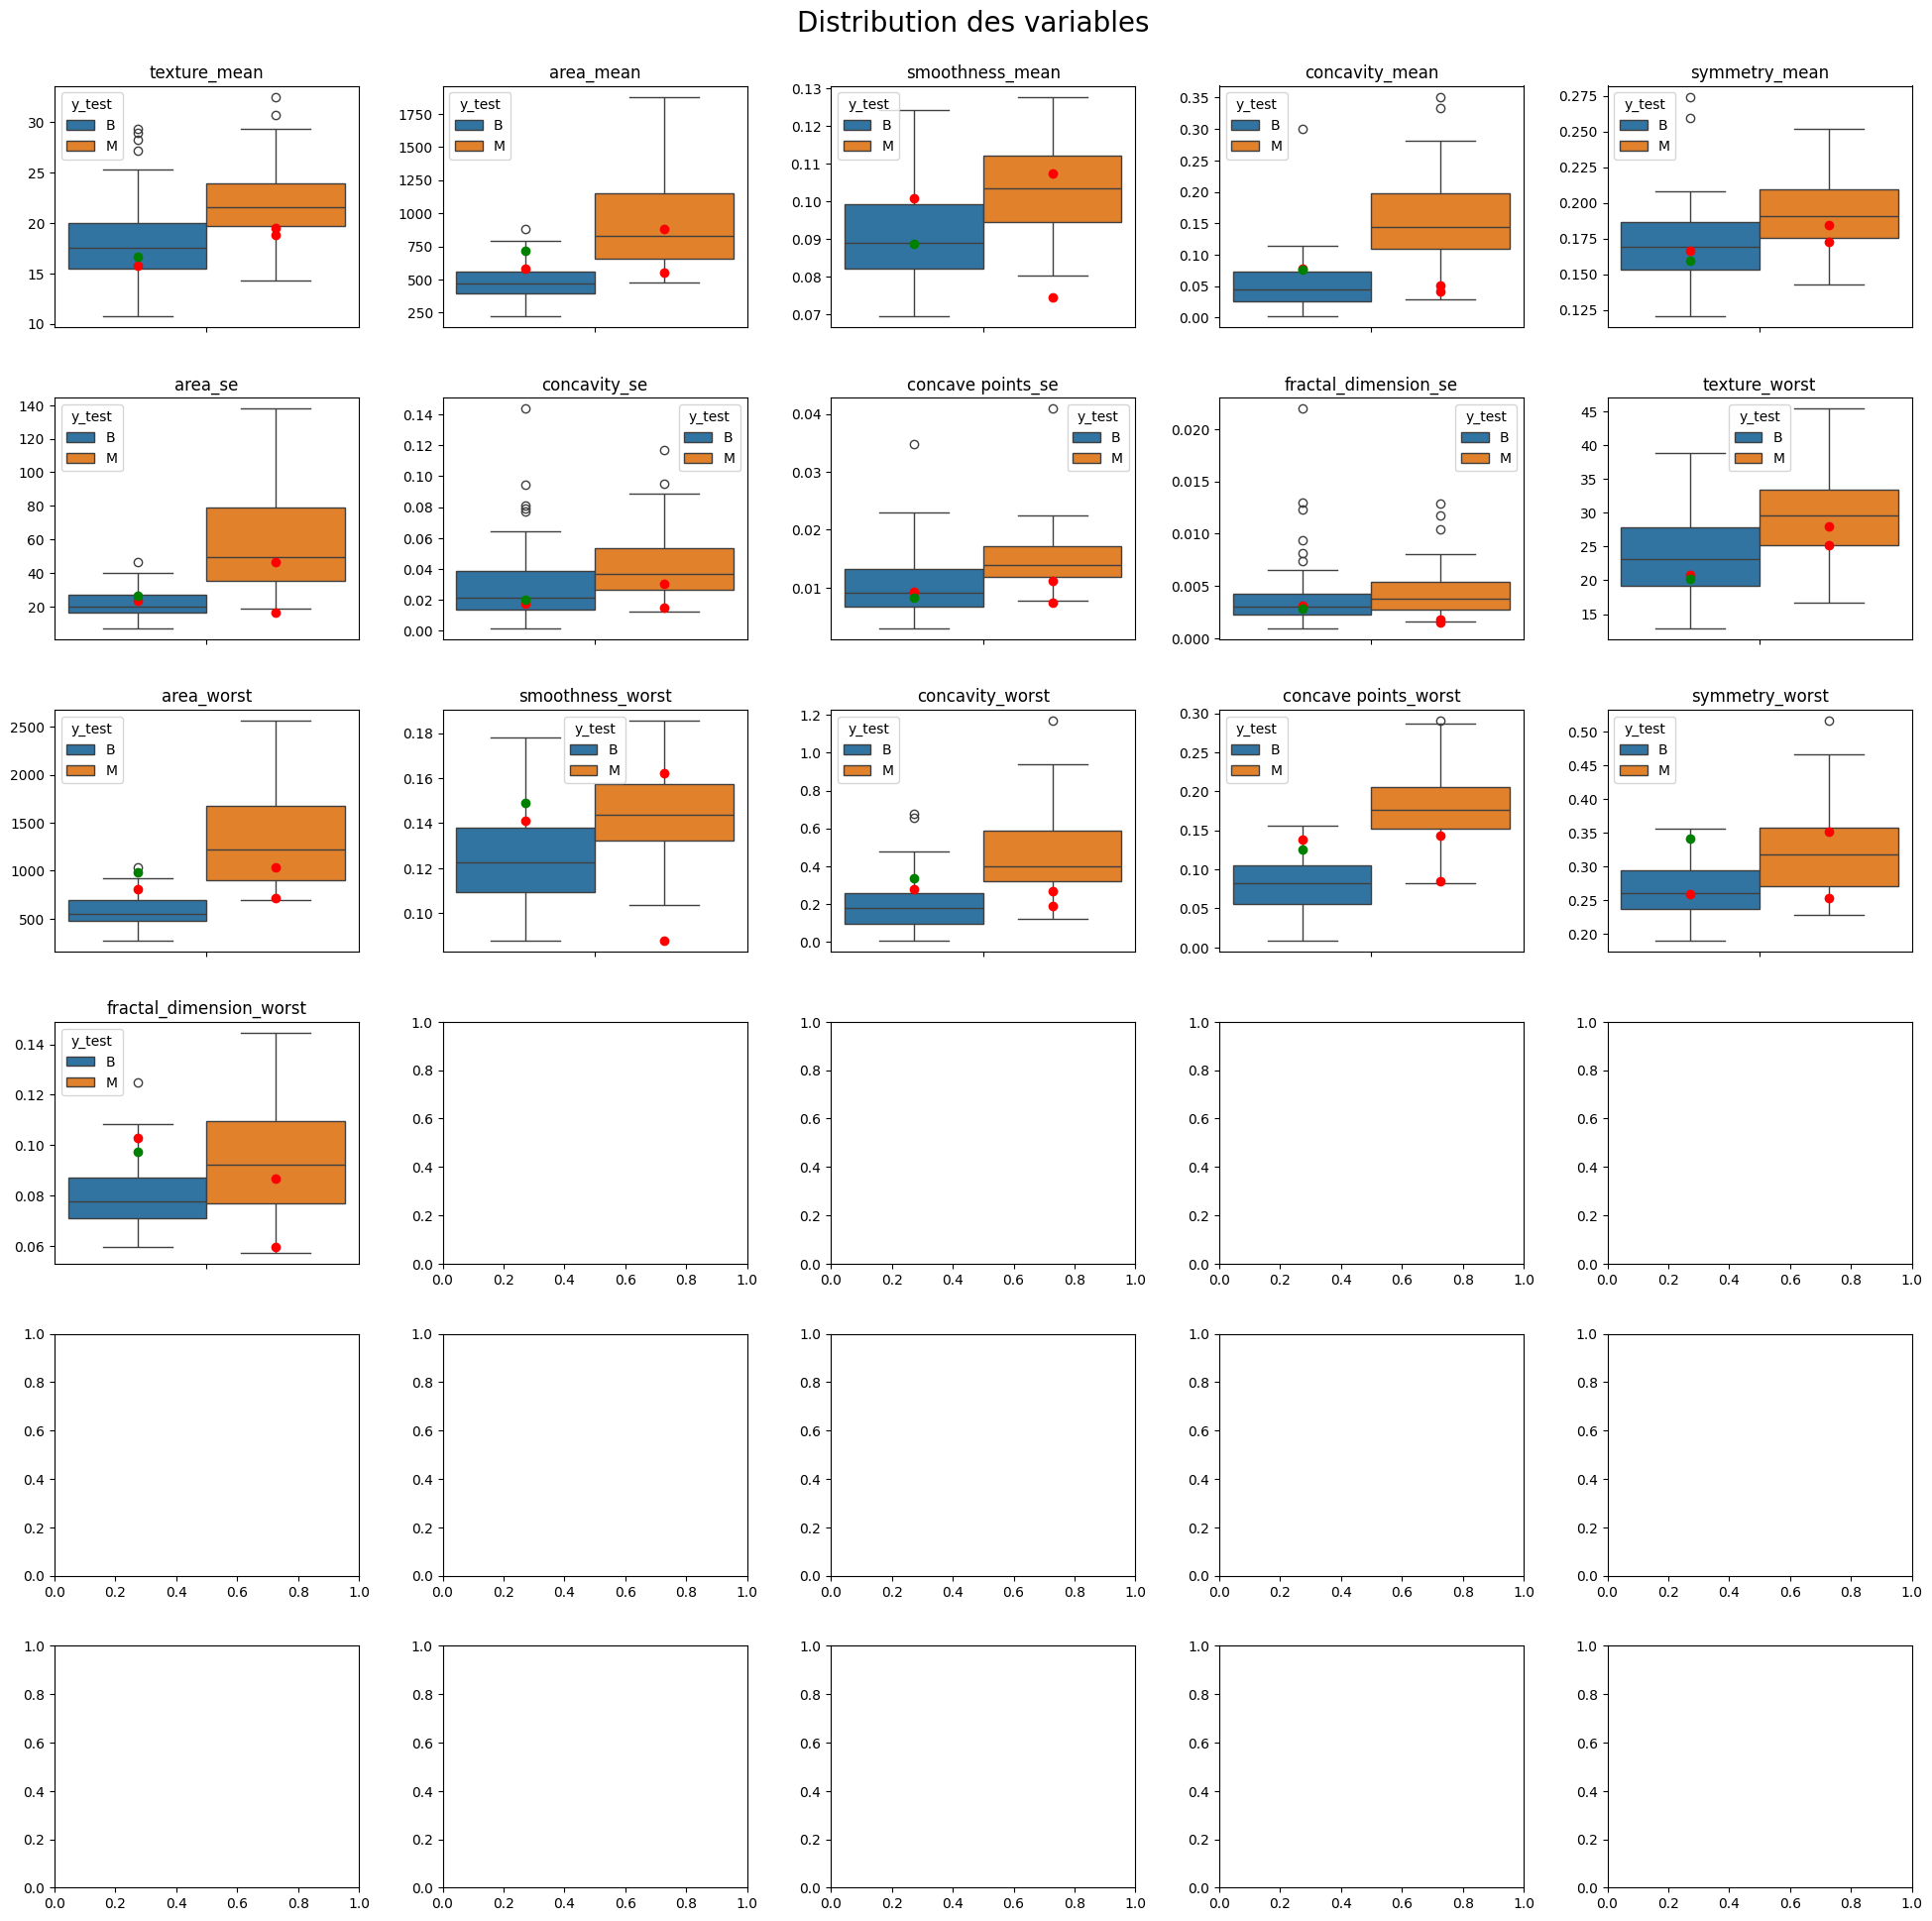

In [229]:
'''
Observation des data ayant une mauvaise prediction sur le jeu de test

si prediction de B alors que M sur le jeu de tets alors affichage des points sur le boxplot test filtré sur M
'''

df_test_predict_MLPC = pd.DataFrame((y_test.values, y_pred_MLPC)).T.rename(columns={0: 'y_test', 1: 'y_pred'})
df_test_predict_MLPC = pd.concat([df_test_predict_MLPC,X_test.reset_index(drop=True)], axis= 1)

bad_predict_M_MLPC = df_test_predict_MLPC[(df_test_predict_MLPC['y_test'] == 'M') & (df_test_predict_MLPC['y_pred'] != 'M')]
bad_predict_B_MLPC = df_test_predict_MLPC[(df_test_predict_MLPC['y_test'] == 'B') & (df_test_predict_MLPC['y_pred'] != 'B')]


colors = [
    'red', 'green', 'orange', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink',
    'brown', 'violet', 'lime', 'olive', 'maroon', 'navy', 'teal', 'grey', 'beige', 'coral',
    'turquoise', 'lavender', 'gold', 'silver', 'plum', 'indigo', 'peach', 'mint', 'azure', 'amber'
]

fig, axes = plt.subplots(6, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_test_predict_MLPC.columns[2:]):
    sns.boxplot(data=df_test_predict_MLPC, y= col,  ax=axes[i//5, i%5], hue='y_test')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')
    
    k = 0
    for _, row in bad_predict_M_MLPC.iterrows():
    
        axes[i//5, i%5].scatter(x=-0.2, y=row[col], color=colors[k], zorder=5)
        k += 1

    l = 0
    for _, row in bad_predict_B_MLPC.iterrows():
    
        axes[i//5, i%5].scatter(x=0.2, y=row[col], color=colors[l], zorder=5)
        k += 1
        
plt.show()

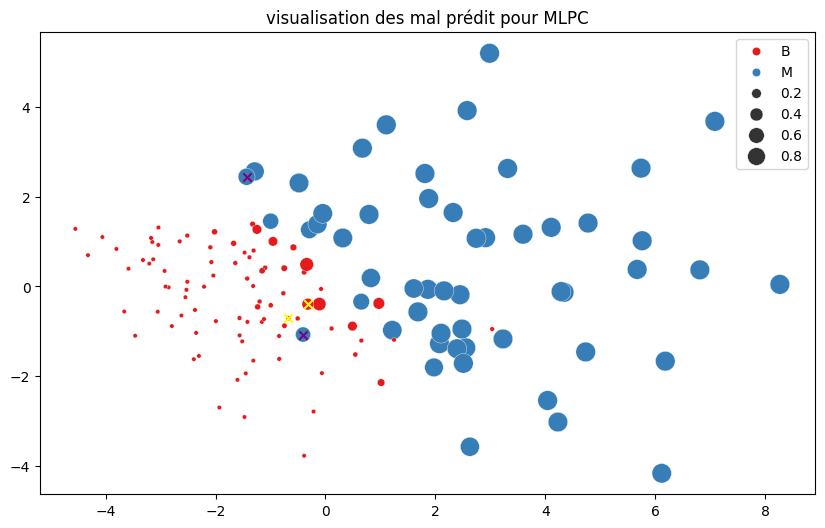

In [230]:
'''
Visualisation des mal prédit
'''

misclassified_M_indices_MLPC = bad_predict_M_MLPC.index
misclassified_B_indices_MLPC = bad_predict_B_MLPC.index

y_probs_MLPC = best_model_MLPC.predict_proba(X_test)


pca_MLPC = PCA(n_components=2)

pipeline_PCA_MLPC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Multi_Layer_Perceptron_Classifier', pca_MLPC)
])

# transformation des données
X_pca_MLPC = pipeline_PCA_MLPC.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x= X_pca_MLPC[:, 0], y= X_pca_MLPC[:, 1], palette='Set1', hue= y_pred_MLPC, size= y_probs_MLPC[:, 1], sizes=(10, 200))

plt.scatter(X_pca_MLPC[misclassified_M_indices_MLPC, 0], X_pca_MLPC[misclassified_M_indices_MLPC, 1], c='yellow', marker='x', label='B au lieu de M')

plt.scatter(X_pca_MLPC[misclassified_B_indices_MLPC, 0], X_pca_MLPC[misclassified_B_indices_MLPC, 1], c='purple', marker='x', label='M au lieu de B')


plt.title('visualisation des mal prédit pour MLPC')


# for idx in misclassified_M_indices_MLPC:
#     plt.annotate(f'Probabilyé d\'être M : {y_probs_MLPC[idx, 1]:.2f}  alors que reel M', (X_pca_MLPC[idx, 0], X_pca_MLPC[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')

# for idx in misclassified_B_indices_MLPC:
#     plt.annotate(f'Prob d\'être B alors que reel B: {y_probs_MLPC[idx, 0]:.2f}', (X_pca_MLPC[idx, 0], X_pca_MLPC[idx, 1]), textcoords='offset points', xytext=(10,-5), ha='center')


plt.show()